In [1]:
import os
import pandas as pd

def load_parquet_files(directory):
    """
    Loads all Parquet files from a specified directory into a dictionary of DataFrames.
    """
    dataframes = {}
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return dataframes

    for filename in os.listdir(directory):
        if filename.endswith('.parquet'):
            file_path = os.path.join(directory, filename)
            try:
                df = pd.read_parquet(file_path)
                dataframes[os.path.splitext(filename)[0]] = df
                print(f"Loaded {filename}")
            except Exception as e:
                print(f"Failed to load {filename}: {e}")
    
    return dataframes

# Standardized data prior to running analysis
stndz_dir = os.path.join(os.getcwd(), '..', 'data', 'processed')

# Load Parquet files into dataframes dictionary
dataframes = load_parquet_files(stndz_dir)

Loaded demographics.parquet
Loaded facilities.parquet
Loaded claims.parquet


In [2]:
# Merge claims and demographics

claims = dataframes['claims']
demographics = dataframes['demographics']

# Join
joined_df = pd.merge(claims, demographics, left_on='clinician_npi', right_on='npi')


In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Aggregate data by specialty, year, and quarter
agg_df = joined_df.groupby(['specialty', 'year', 'quarter']).agg({'total_claims': 'sum'}).reset_index()

# Convert year and quarter to a single datetime column
agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))
agg_df = agg_df.sort_values(by=['specialty', 'date'])

min_periods = 8  # arbitrary choice, adjust based on complexity

for specialty in agg_df['specialty'].unique():
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    ts_data = specialty_df.set_index('date')['total_claims']

    if len(ts_data) >= min_periods:
        # Fit SARIMA model
        model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
        results = model.fit()
    else:
        print(f"Not enough data for {specialty}. Only {len(ts_data)} periods available.")


# # Forecasting for each specialty
# forecasts = {}

# for specialty in agg_df['specialty'].unique():
#     specialty_df = agg_df[agg_df['specialty'] == specialty]
    
#     # Set date as index
#     ts_data = specialty_df.set_index('date')['total_claims']

    # # check for missing values
    # print(ts_data.head())
    # print(ts_data.isnull().sum())

    # # Fit SARIMA model
    # model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
    # results = model.fit()
    
    # # Forecast for future periods (e.g., 4 quarters ahead)
    # forecast = results.get_forecast(steps=4)
    # forecasts[specialty] = forecast.predicted_mean

# # Plot
# for specialty, forecast in forecasts.items():
#     plt.figure(figsize=(10, 6))
#     plt.plot(forecast)
#     plt.title(f'Forecast for {specialty} Specialty')
#     plt.xlabel('Date')
#     plt.ylabel('Total Claims')
#     plt.show()


/var/folders/nv/yklnrk8j1x12vh39751vkm6w0000gn/T/ipykernel_9008/2529047356.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79466D+00    |proj g|=  1.63188D-01

At iterate    5    f=  2.68926D+00    |proj g|=  1.16545D-02

At iterate   10    f=  2.68437D+00    |proj g|=  6.11957D-03

At iterate   15    f=  2.68427D+00    |proj g|=  9.81109D-04

At iterate   20    f=  2.68204D+00    |proj g|=  2.10708D-02

At iterate   25    f=  2.61892D+00    |proj g|=  9.36203D-02

At iterate   30    f=  2.60830D+00    |proj g|=  2.71402D-02

At iterate   35    f=  2.60690D+00    |proj g|=  7.12021D-03

At iterate   40    f=  2.60657D+00    |proj g|=  6.79432D-03

At iterate   45    f=  2.60600D+00    |proj g|=  6.29340D-04

At iterate   50    f=  2.60573D+00    |proj g|=  3.04355D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 Th

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10402D+00    |proj g|=  4.91316D-01

At iterate    5    f=  3.08910D+00    |proj g|=  4.95103D-01

At iterate   10    f=  3.01397D+00    |proj g|=  7.61173D-01

At iterate   15    f=  2.98279D+00    |proj g|=  6.76906D-02

At iterate   20    f=  2.97038D+00    |proj g|=  7.21879D-02

At iterate   25    f=  2.96973D+00    |proj g|=  1.97331D-03

At iterate   30    f=  2.96972D+00    |proj g|=  2.46931D-03

At iterate   35    f=  2.96938D+00    |proj g|=  3.07619D-02

At iterate   40    f=  2.94462D+00    |proj g|=  1.49460D-01

At iterate   45    f=  2.90019D+00    |proj g|=  4.93173D-02

At iterate   50    f=  2.89875D+00    |proj g|=  1.29204D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   10    f=  3.26861D+00    |proj g|=  1.50048D-01

At iterate   15    f=  3.25732D+00    |proj g|=  8.29368D-03

At iterate   20    f=  3.25724D+00    |proj g|=  1.29040D-04

At iterate   25    f=  3.25722D+00    |proj g|=  2.86325D-03

At iterate   30    f=  3.25359D+00    |proj g|=  2.69093D-02
  ys=-9.180E-02  -gs= 1.054E-01 BFGS update SKIPPED

At iterate   35    f=  2.99272D+00    |proj g|=  4.90252D-02

At iterate   40    f=  2.99026D+00    |proj g|=  3.66964D-02

At iterate   45    f=  2.98888D+00    |proj g|=  1.28698D-02

At iterate   50    f=  2.98860D+00    |proj g|=  3.33987D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64942D+00    |proj g|=  2.52799D+00

At iterate    5    f=  3.41871D+00    |proj g|=  3.57303D-01

At iterate   10    f=  3.41543D+00    |proj g|=  6.30782D-02

At iterate   15    f=  3.40613D+00    |proj g|=  1.08883D-02

At iterate   20    f=  3.40160D+00    |proj g|=  5.20027D-02

At iterate   25    f=  3.40134D+00    |proj g|=  3.04291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   25    f=  2.38185D+00    |proj g|=  4.79354D-03

At iterate   30    f=  2.38087D+00    |proj g|=  7.21951D-03

At iterate   35    f=  2.38069D+00    |proj g|=  6.04737D-03

At iterate   40    f=  2.38061D+00    |proj g|=  1.14570D-03

At iterate   45    f=  2.38058D+00    |proj g|=  1.20018D-03

At iterate   50    f=  2.38057D+00    |proj g|=  4.82804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66      1     0     0   4.828D-04   2.381D+00
  F =   2.3805686099859349     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 Th


At iterate   20    f=  2.97246D+00    |proj g|=  7.52515D-03

At iterate   25    f=  2.93645D+00    |proj g|=  4.71558D-02

At iterate   30    f=  2.91655D+00    |proj g|=  1.46485D-02

At iterate   35    f=  2.91017D+00    |proj g|=  7.75617D-03

At iterate   40    f=  2.90789D+00    |proj g|=  3.96147D-03

At iterate   45    f=  2.90726D+00    |proj g|=  6.17025D-04

At iterate   50    f=  2.90717D+00    |proj g|=  1.25381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   1.254D-03   2.907D+00
  F =   2.9071650873467312     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   10    f=  4.14140D+00    |proj g|=  5.09923D-01

At iterate   15    f=  4.12910D+00    |proj g|=  4.55681D-01

At iterate   20    f=  4.10815D+00    |proj g|=  1.76078D-01

At iterate   25    f=  4.10263D+00    |proj g|=  1.65284D-02

At iterate   30    f=  4.10261D+00    |proj g|=  2.56891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     38      1     0     0   2.569D-05   4.103D+00
  F =   4.1026136461987628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   25    f=  2.64109D+00    |proj g|=  5.29232D-02

At iterate   30    f=  2.63149D+00    |proj g|=  1.28675D-02

At iterate   35    f=  2.62946D+00    |proj g|=  8.24888D-03

At iterate   40    f=  2.62909D+00    |proj g|=  2.86215D-03

At iterate   45    f=  2.62905D+00    |proj g|=  9.92192D-04

At iterate   50    f=  2.62903D+00    |proj g|=  2.03637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   2.036D-03   2.629D+00
  F =   2.6290300071293355     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   15    f=  2.24768D+00    |proj g|=  1.15116D-02

At iterate   20    f=  2.24551D+00    |proj g|=  9.97199D-03

At iterate   25    f=  2.24413D+00    |proj g|=  8.92865D-03

At iterate   30    f=  2.24362D+00    |proj g|=  4.92701D-03

At iterate   35    f=  2.24350D+00    |proj g|=  1.27284D-03

At iterate   40    f=  2.24348D+00    |proj g|=  2.76367D-05

At iterate   45    f=  2.24348D+00    |proj g|=  3.79020D-04

At iterate   50    f=  2.24342D+00    |proj g|=  1.93493D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   1.935D-03   2.243D+00
  F =   2.24342419815

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   15    f=  2.46845D+00    |proj g|=  2.83554D-03

At iterate   20    f=  2.46773D+00    |proj g|=  6.26192D-04

At iterate   25    f=  2.46768D+00    |proj g|=  1.62910D-04

At iterate   30    f=  2.46768D+00    |proj g|=  3.12598D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.033D-06   2.468D+00
  F =   2.4676780515888002     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters exce


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     39      1     0     0   3.491D-03   3.149D+00
  F =   3.1488621774511358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04592D+00    |proj g|=  1.09948D+01

At iterate    5    f=  2.85480D+00    |proj g|=  8.30857D-01

At iterate   10    f=  2.75994D+00    |proj g|=  1.14686D-01

At iterate   15    f=  2.75754D+00    |proj g|=  1.00368D-02

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   35    f=  1.57208D+00    |proj g|=  3.57134D-03

At iterate   40    f=  1.57165D+00    |proj g|=  2.48264D-03

At iterate   45    f=  1.57130D+00    |proj g|=  1.77956D-03

At iterate   50    f=  1.57118D+00    |proj g|=  2.81127D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   2.811D-04   1.571D+00
  F =   1.5711764919714377     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42957D+00    |proj g|=  6.13195D-01

At iterate    5    f=  3.35618D+00    |proj g|=  4.93832D-01

At iterate   10    f=  3.23881D+00    |proj g|=  1.52833D-02

At iterate   15    f=  3.17930D+00    |proj g|=  9.32488D-03

At iterate   20    f=  3.17827D+00    |proj g|=  1.52203D-03

At iterate   25    f=  3.17783D+00    |proj g|=  1.80724D-04

At iterate   30    f=  3.17777D+00    |proj g|=  2.22623D-03

At iterate   35    f=  3.16360D+00    |proj g|=  3.65735D-02

At iterate   40    f=  3.11781D+00    |proj g|=  2.89160D-02

At iterate   45    f=  3.08928D+00    |proj g|=  1.87901D-02

At iterate   50    f=  3.08167D+00    |proj g|=  8.49850D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   45    f=  2.77616D+00    |proj g|=  1.28557D-03

At iterate   50    f=  2.77610D+00    |proj g|=  7.60027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   7.600D-04   2.776D+00
  F =   2.7760967691701417     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73119D+00    |proj g|=  1.51762D+00

At iterate    5    f=  3.48287D+00    |proj g|=  1.45457D+00

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   40    f=  3.36545D+00    |proj g|=  9.57068D-04

At iterate   45    f=  3.35555D+00    |proj g|=  5.80424D-02

At iterate   50    f=  3.08614D+00    |proj g|=  1.05819D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   1.058D-01   3.086D+00
  F =   3.0861375159422790     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15653D+00    |proj g|=  5.80008D-01

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   35    f=  3.65010D+00    |proj g|=  1.51266D-04

At iterate   40    f=  3.64956D+00    |proj g|=  2.12336D-04

At iterate   45    f=  3.64946D+00    |proj g|=  1.55680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     55      1     0     0   1.557D-06   3.649D+00
  F =   3.6494577468929670     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16043D+00    |proj g|=  8.79971D-01

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 Th


At iterate   50    f=  2.80757D+00    |proj g|=  1.18806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   1.188D-03   2.808D+00
  F =   2.8075697156842794     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03653D+00    |proj g|=  3.24889D-02

At iterate    5    f=  1.97375D+00    |proj g|=  5.51969D-03

At iterate   10    f=  1.97079D+00    |proj g|=  7.75409D-03

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim

At iterate   50    f=  1.85772D+00    |proj g|=  3.53648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   3.536D-03   1.858D+00
  F =   1.8577177379264789     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83085D+00    |proj g|=  2.84245D-02

At iterate    5    f=  2.76669D+00    |proj g|=  4.21550D-03

At iterate   10    f=  2.76595D+00    |proj g|=  3.09048D-04

At itera

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36630D+00    |proj g|=  4.86391D+01

At iterate    5    f=  4.06303D+00    |proj g|=  7.90034D+00

At iterate   10    f=  3.29652D+00    |proj g|=  4.72875D-01

At iterate   15    f=  3.23562D+00    |proj g|=  3.31774D+00

At iterate   20    f=  3.19440D+00    |proj g|=  5.25738D-01

At iterate   25    f=  3.18722D+00    |proj g|=  2.72498D-01

At iterate   30    f=  3.18450D+00    |proj g|=  8.33740D-02

At iterate   35    f=  3.18345D+00    |proj g|=  4.14047D-02

At iterate   40    f=  3.18328D+00    |proj g|=  3.59834D-03

At iterate   45    f=  3.18321D+00    |proj g|=  1.02685D-02

At iterate   50    f=  3.18318D+00    |proj g|=  1.20380D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 Th

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41073D+00    |proj g|=  1.35311D+00

At iterate    5    f=  3.27894D+00    |proj g|=  1.32435D+00

At iterate   10    f=  3.18611D+00    |proj g|=  1.46166D-01

At iterate   15    f=  3.17255D+00    |proj g|=  4.20489D-02

At iterate   20    f=  3.17128D+00    |proj g|=  1.67488D-04

At iterate   25    f=  3.17128D+00    |proj g|=  2.42371D-03

At iterate   30    f=  3.17111D+00    |proj g|=  9.37259D-03

At iterate   35    f=  3.04483D+00    |proj g|=  1.52115D-01

At iterate   40    f=  3.01527D+00    |proj g|=  1.86629D-02

At iterate   45    f=  3.00309D+00    |proj g|=  6.72480D-03

At iterate   50    f=  2.99482D+00    |proj g|=  1.53275D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   45    f=  2.44894D+00    |proj g|=  3.43104D-03

At iterate   50    f=  2.44853D+00    |proj g|=  4.27843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   4.278D-03   2.449D+00
  F =   2.4485327516373099     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32548D+00    |proj g|=  5.85799D-02

At iterate    5    f=  2.27547D+00    |proj g|=  7.90622D-03

At iter

/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim


At iterate   50    f=  2.58896D+00    |proj g|=  5.39684D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   5.397D-02   2.589D+00
  F =   2.5889564205978135     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/var/folders/nv/yklnrk8j1x12vh39751vkm6w0000gn/T/ipykernel_9008/3419552241.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))


Forecast for ALLERGY & IMMUNOLOGY: 6223.333333333333
Forecast for ANESTHESIOLOGY: 39096.333333333336
Forecast for COLON & RECTAL SURGERY: 5776.0
Forecast for DERMATOLOGY: 27126.0
Forecast for EMERGENCY MEDICINE: 78857.0
Forecast for FAMILY MEDICINE: 108958.0
Forecast for GENERAL PRACTICE: 106.66666666666667
Forecast for HOSPITALIST: 2056.6666666666665
Forecast for INDEPENDENT MEDICAL EXAMINER: 14.333333333333334
Forecast for INTERNAL MEDICINE: 468984.3333333333
Forecast for MEDICAL GENETICS: 491.3333333333333
Forecast for NEUROLOGICAL SURGERY: 6494.333333333333
Forecast for NEUROMUSCULOSKELETAL MEDICINE & OMM: 539.6666666666666
Forecast for NUCLEAR MEDICINE: 1821.3333333333333
Forecast for OBSTETRICS & GYNECOLOGY: 73219.33333333333
Forecast for OPHTHALMOLOGY: 50395.0
Forecast for ORAL & MAXILLOFACIAL SURGERY: 15.666666666666666
Forecast for ORTHOPAEDIC SURGERY: 37966.666666666664
Forecast for OTOLARYNGOLOGY: 18876.0
Forecast for PAIN MEDICINE: 791.6666666666666
Forecast for PATHOLOGY: 

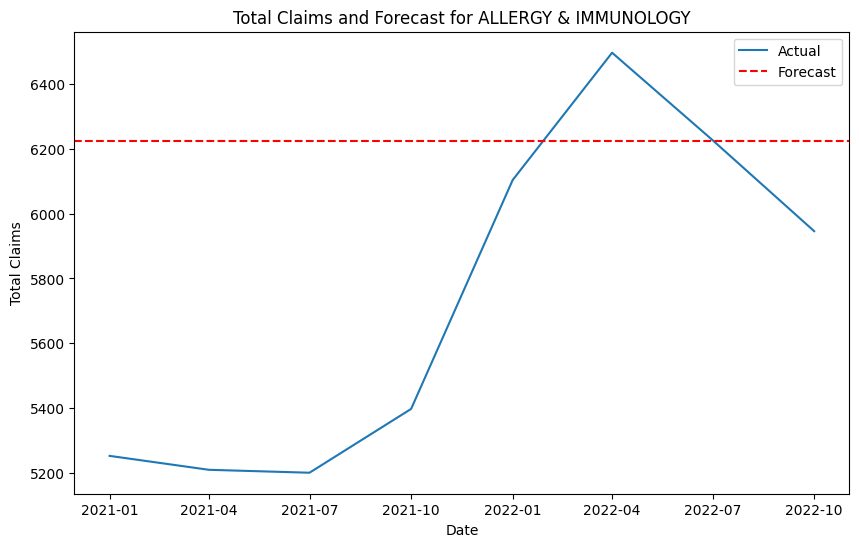

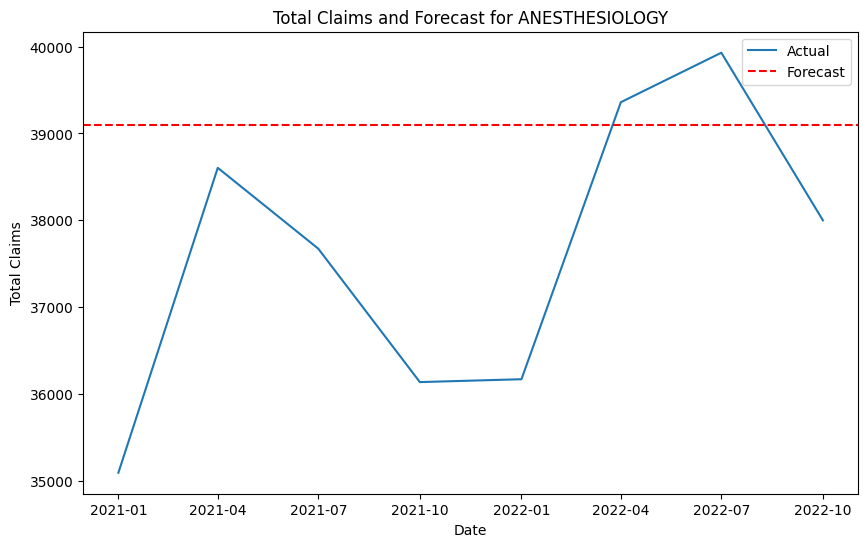

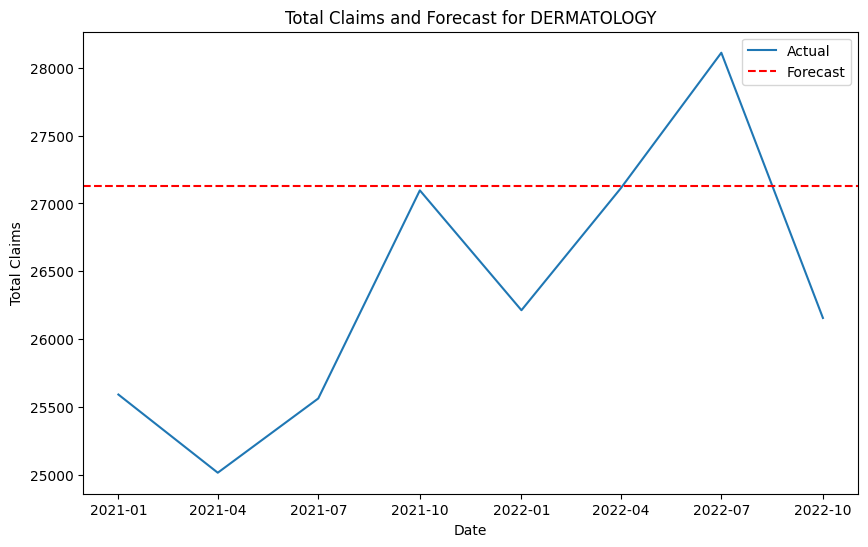

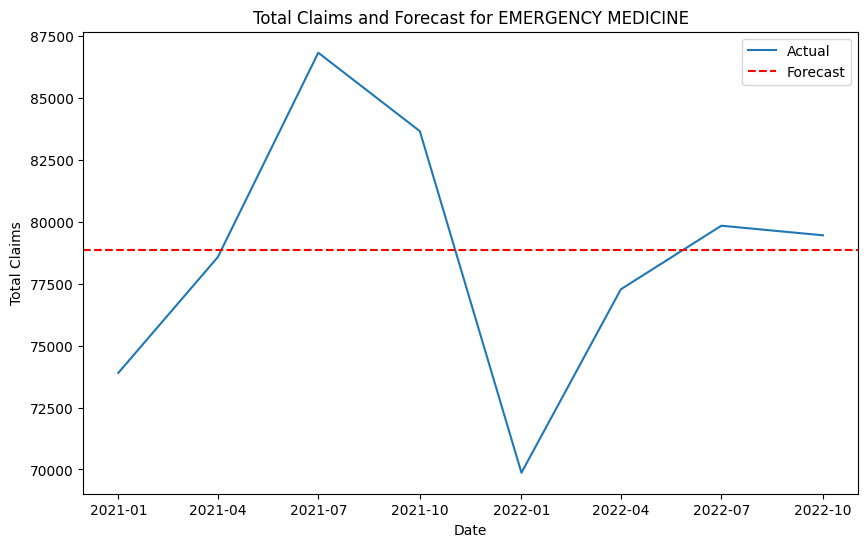

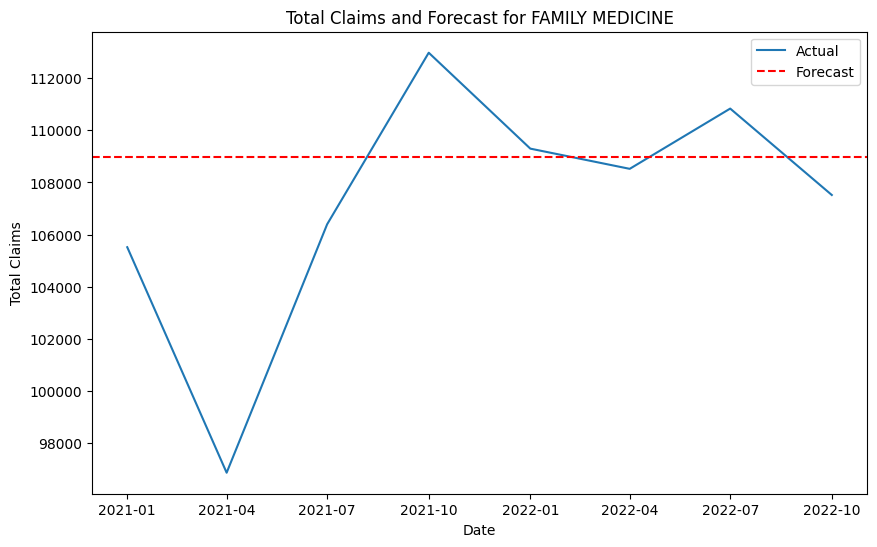

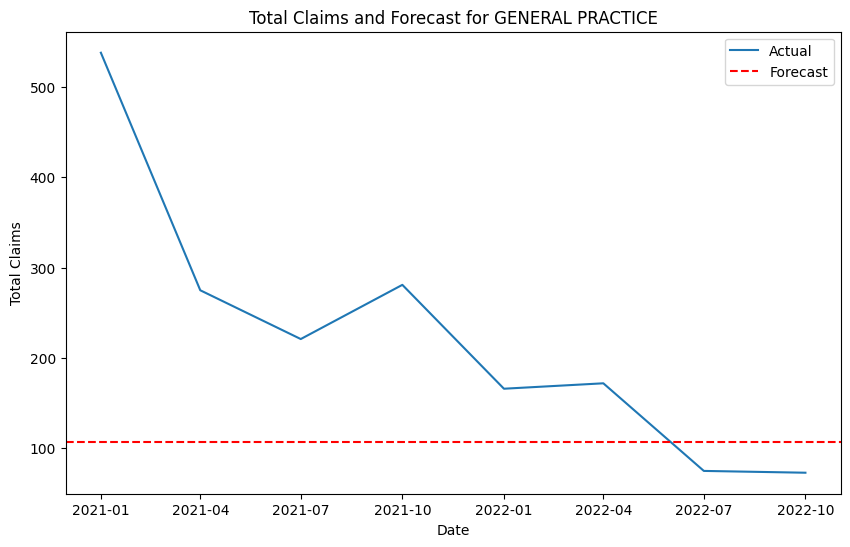

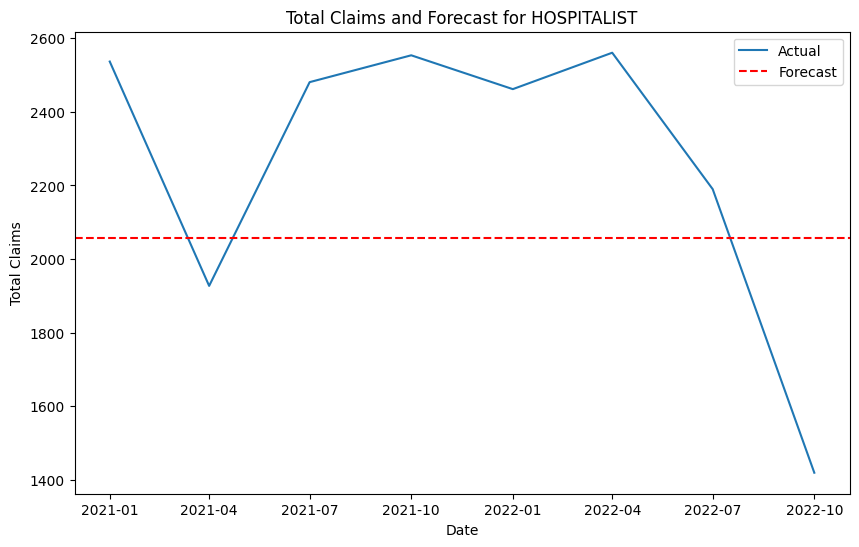

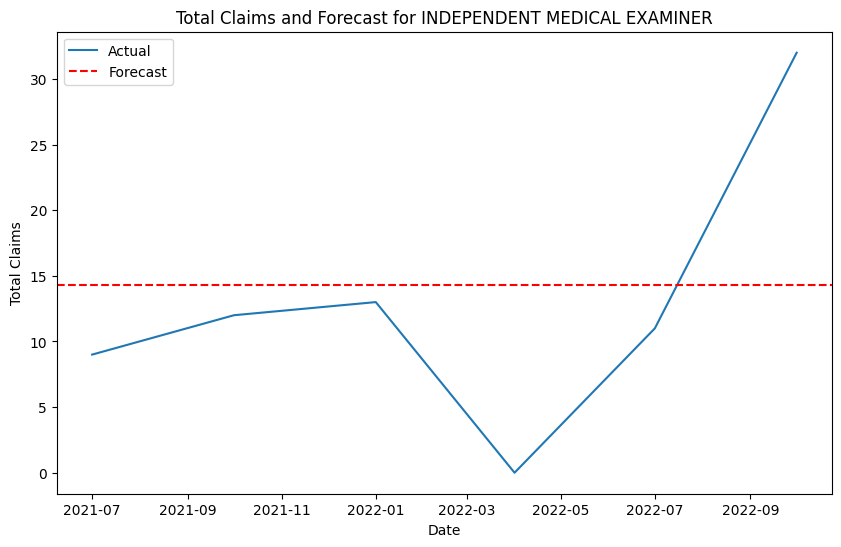

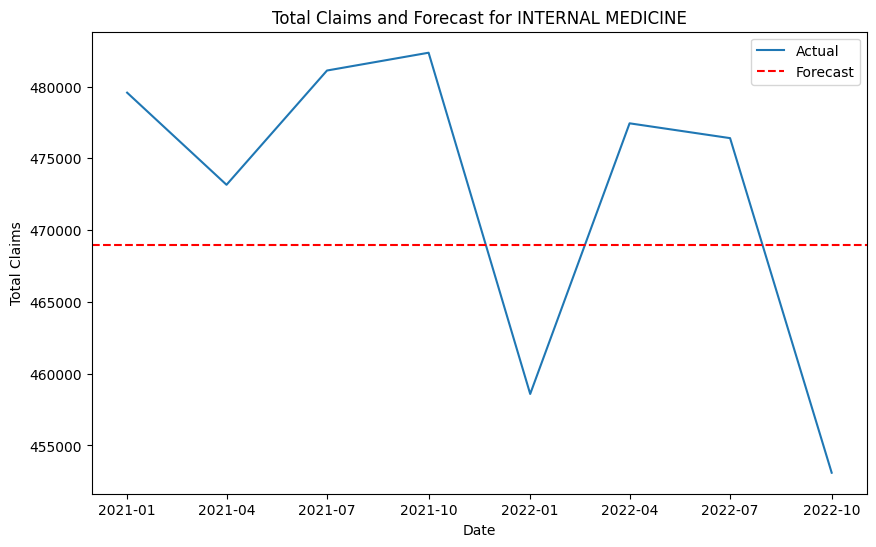

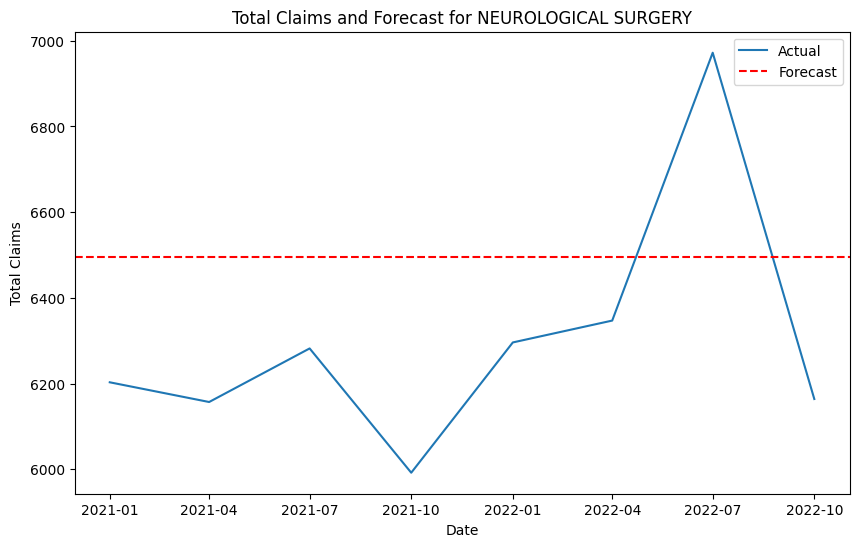

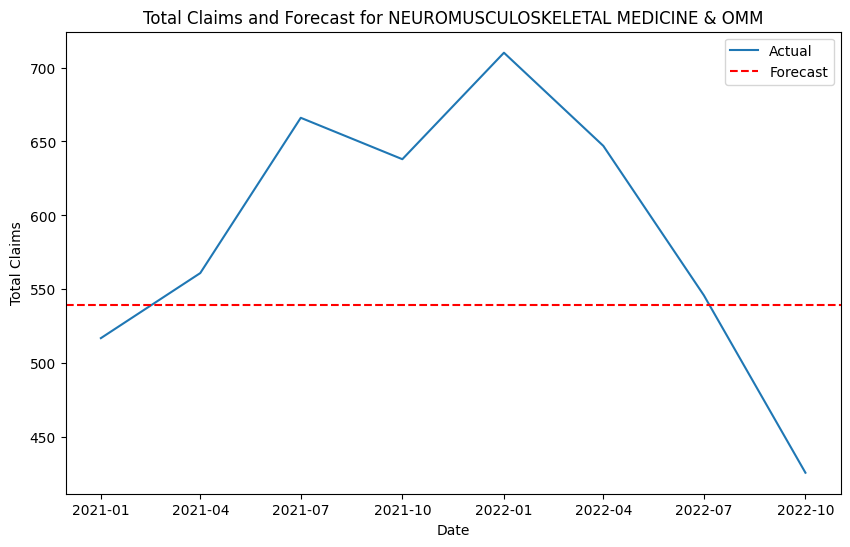

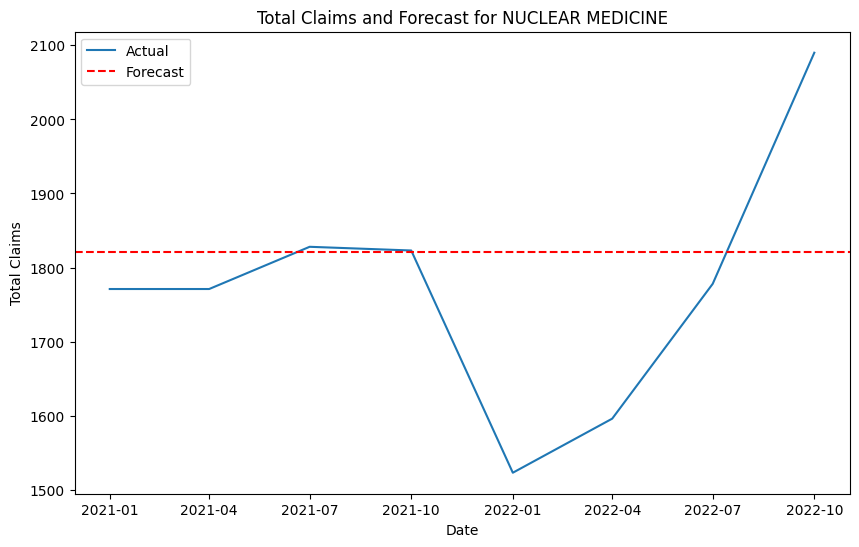

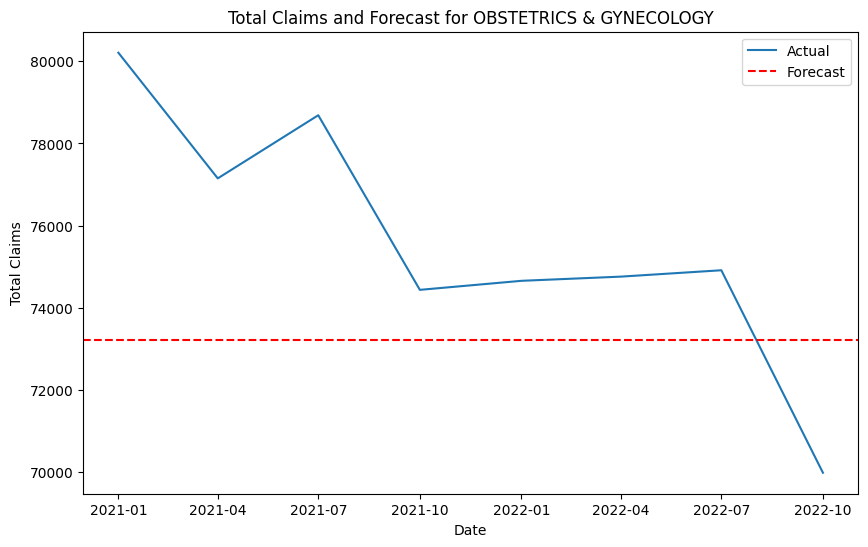

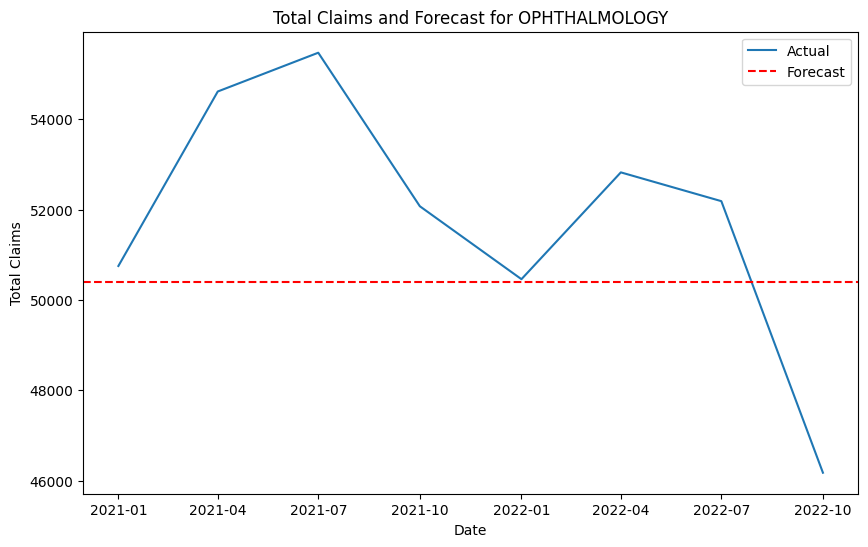

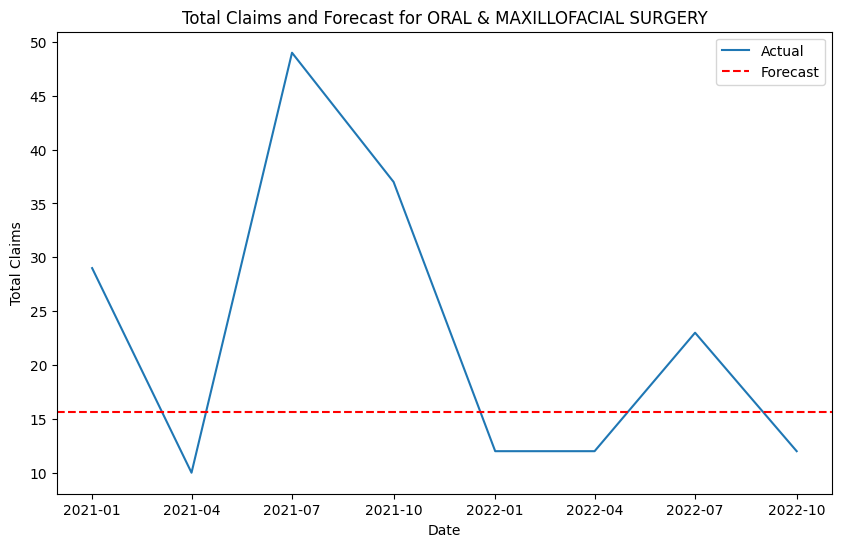

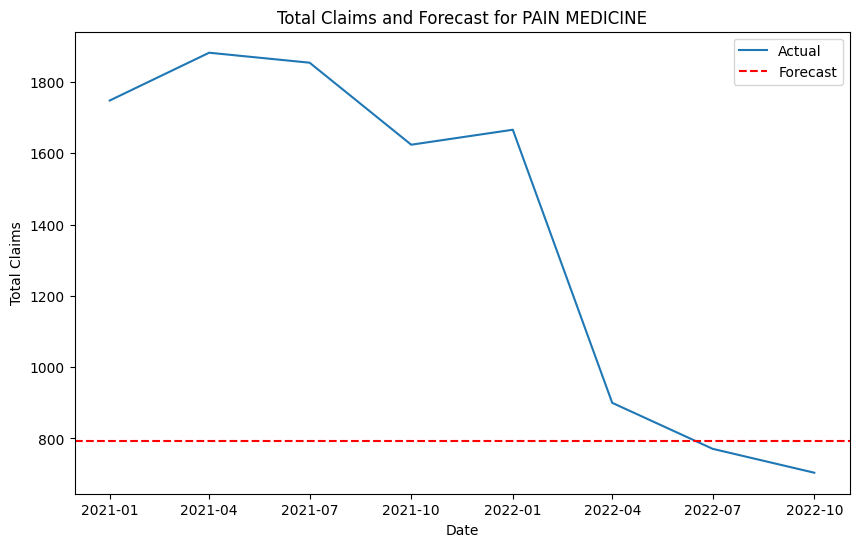

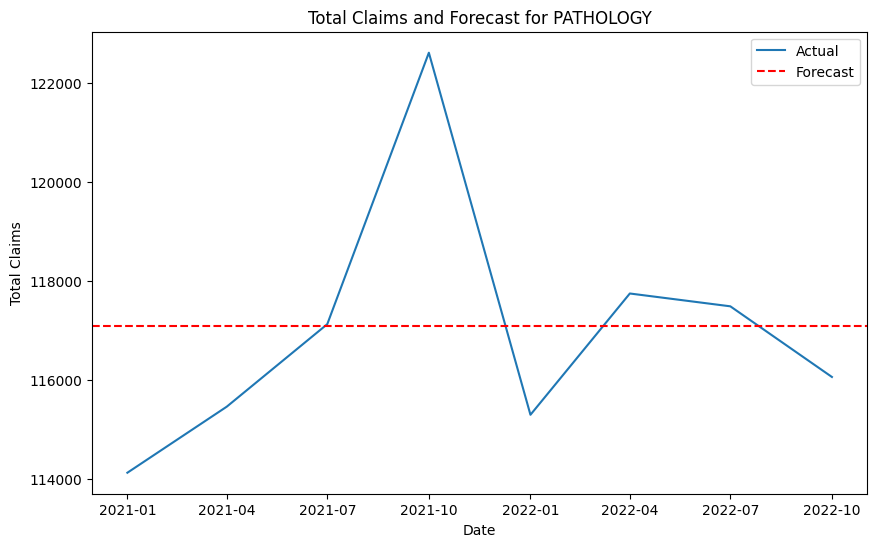

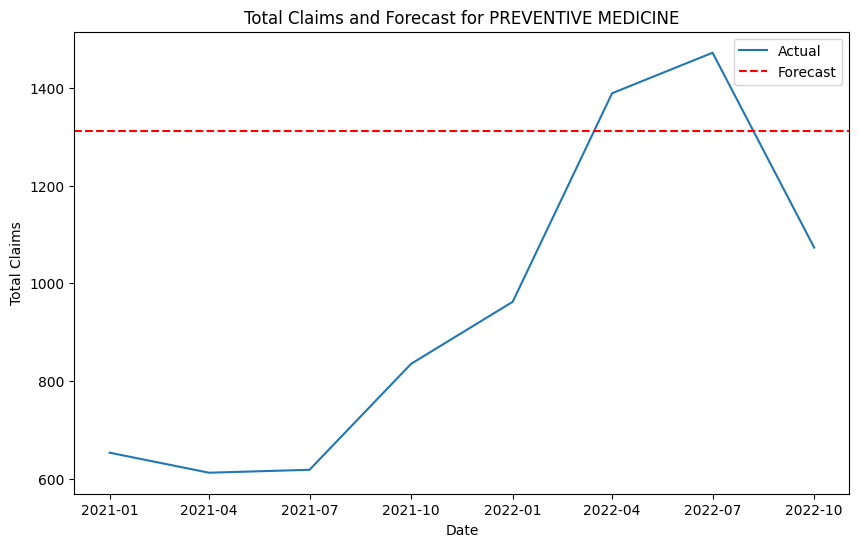

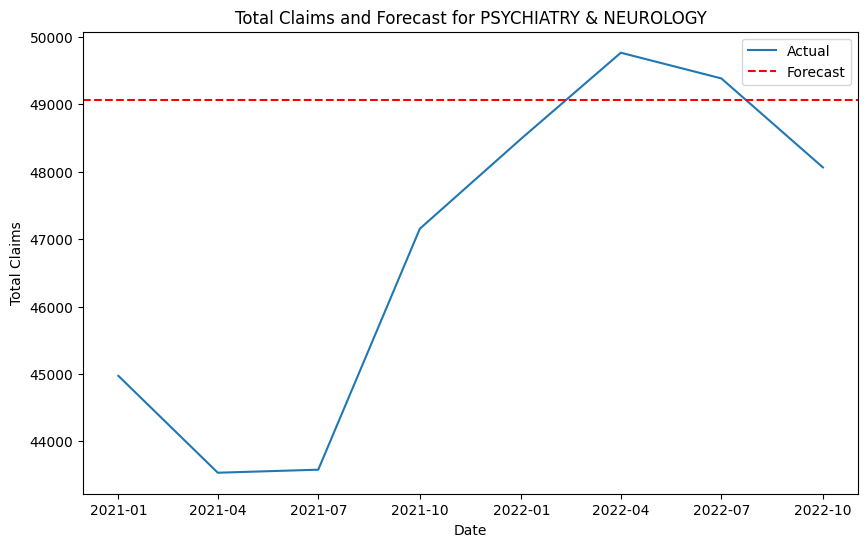

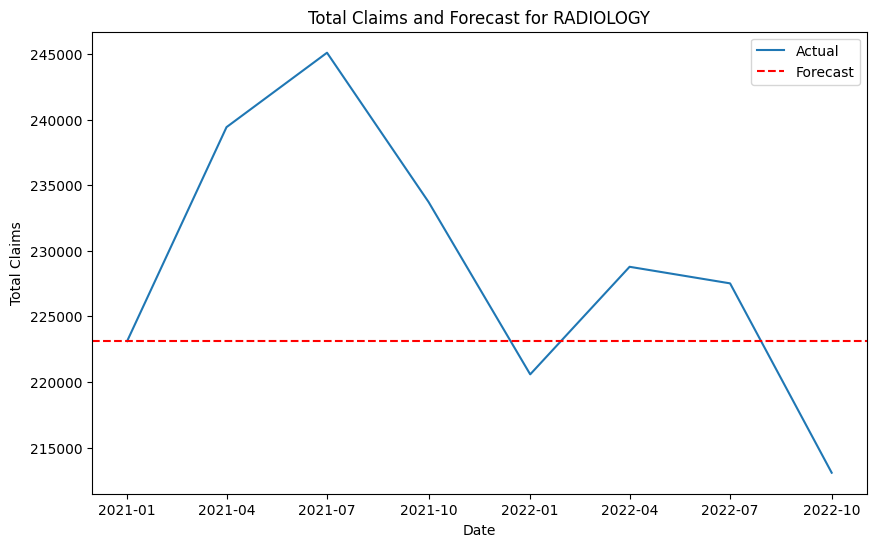

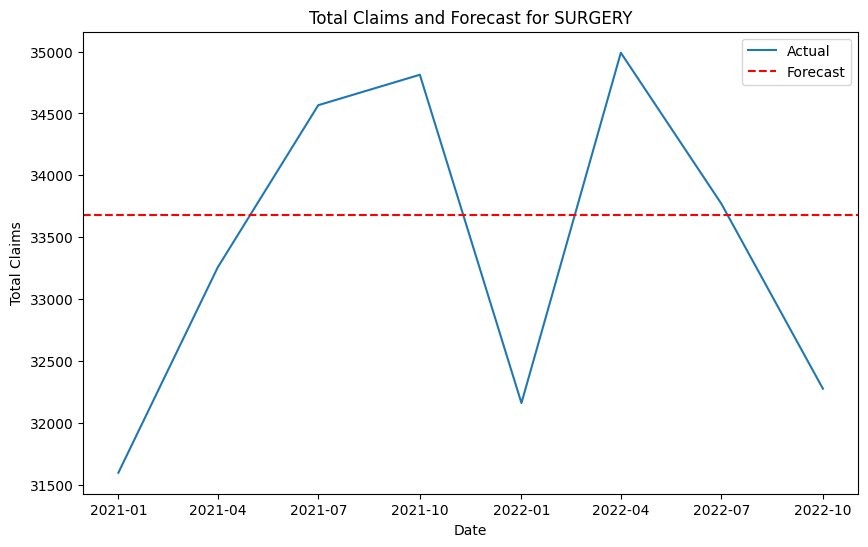

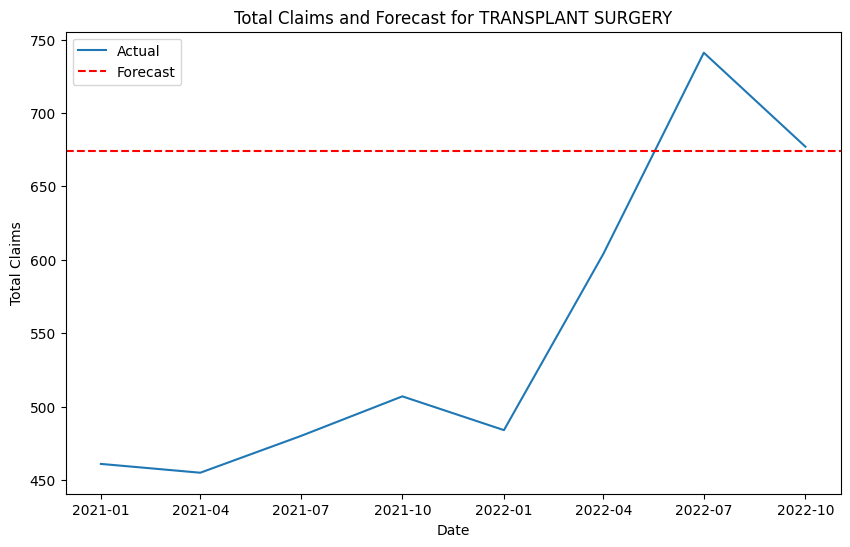

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate data by specialty, year, and quarter
agg_df = joined_df.groupby(['specialty', 'year', 'quarter']).agg({'total_claims': 'sum'}).reset_index()

# Convert year and quarter to a single datetime column
agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))

# Moving Average Forecast
window_size = 3  
forecasts = {}

for specialty in agg_df['specialty'].unique():
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    ts_data = specialty_df.set_index('date')['total_claims']

    # Calculate moving average
    moving_avg = ts_data.rolling(window=window_size).mean().iloc[-1]
    
    # Store the forecast
    forecasts[specialty] = moving_avg

# Display the forecasts
for specialty, forecast in forecasts.items():
    print(f"Forecast for {specialty}: {forecast}")

# Optional: Plot the results
for specialty in forecasts:
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    plt.figure(figsize=(10, 6))
    plt.plot(specialty_df['date'], specialty_df['total_claims'], label='Actual')
    plt.axhline(y=forecasts[specialty], color='r', linestyle='--', label='Forecast')
    plt.title(f'Total Claims and Forecast for {specialty}')
    plt.xlabel('Date')
    plt.ylabel('Total Claims')
    plt.legend()
    plt.show()


/var/folders/nv/yklnrk8j1x12vh39751vkm6w0000gn/T/ipykernel_9008/2140458507.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/li

Forecast for ALLERGY & IMMUNOLOGY in 2023: [5947.41170043 5947.41170043 5947.41170043 5947.41170043]
Forecast for ANESTHESIOLOGY in 2023: [38477.39298766 38477.39298766 38477.39298766 38477.39298766]
Forecast for COLON & RECTAL SURGERY in 2023: [5608.00000295 5608.00000295 5608.00000295 5608.00000295]
Forecast for DERMATOLOGY in 2023: [26777.62310006 26777.62310006 26777.62310006 26777.62310006]
Forecast for EMERGENCY MEDICINE in 2023: [78138.54486214 78138.54486214 78138.54486214 78138.54486214]
Forecast for FAMILY MEDICINE in 2023: [107572.55012707 107572.55012707 107572.55012707 107572.55012707]
Forecast for GENERAL PRACTICE in 2023: [73.00000003 73.00000003 73.00000003 73.00000003]
Forecast for HOSPITALIST in 2023: [1523.88228335 1523.88228335 1523.88228335 1523.88228335]
Forecast for INDEPENDENT MEDICAL EXAMINER in 2023: [9.00000035 9.00000035 9.00000035 9.00000035]
Forecast for INTERNAL MEDICINE in 2023: [469648.4502278 469648.4502278 469648.4502278 469648.4502278]
Forecast for M

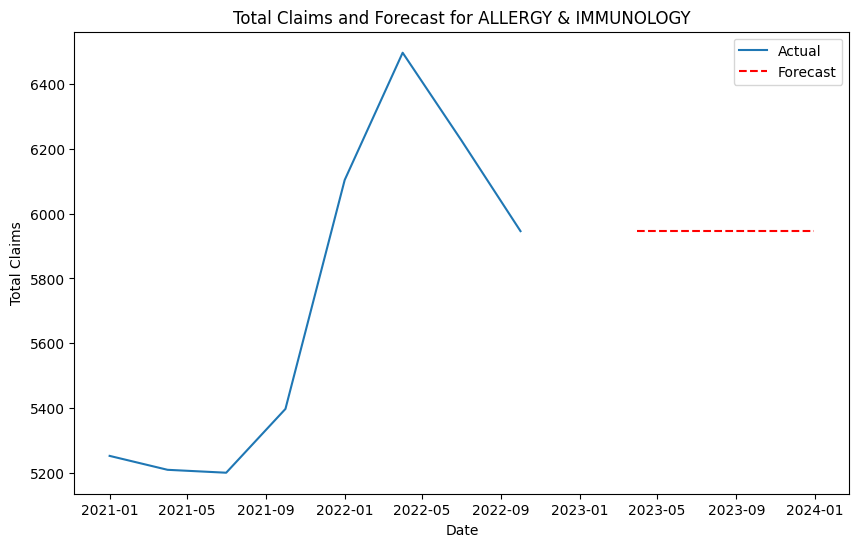

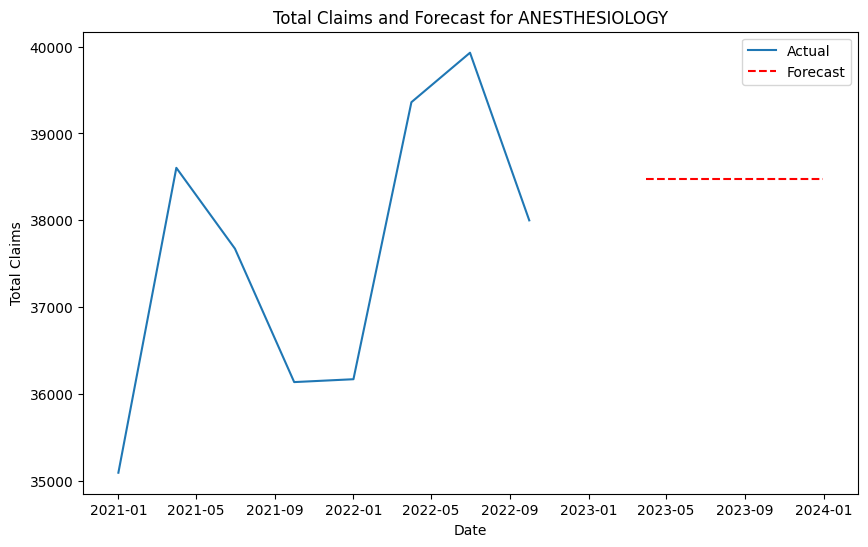

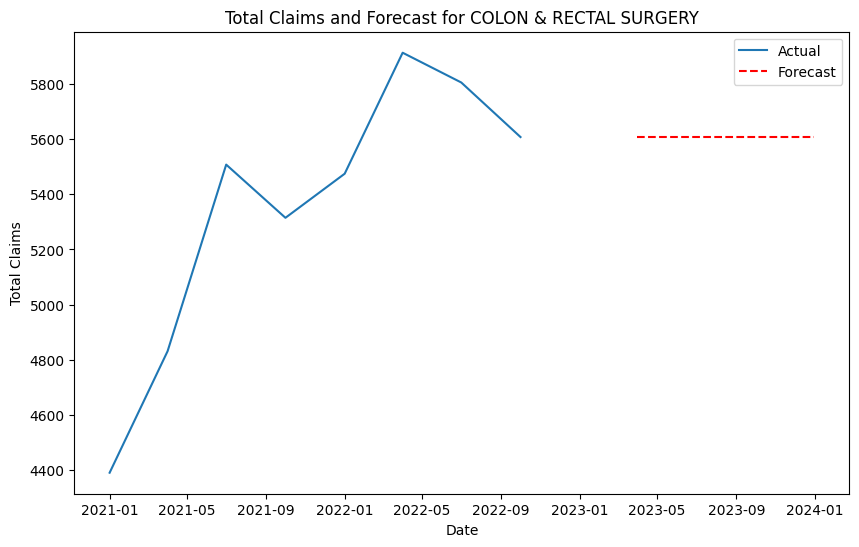

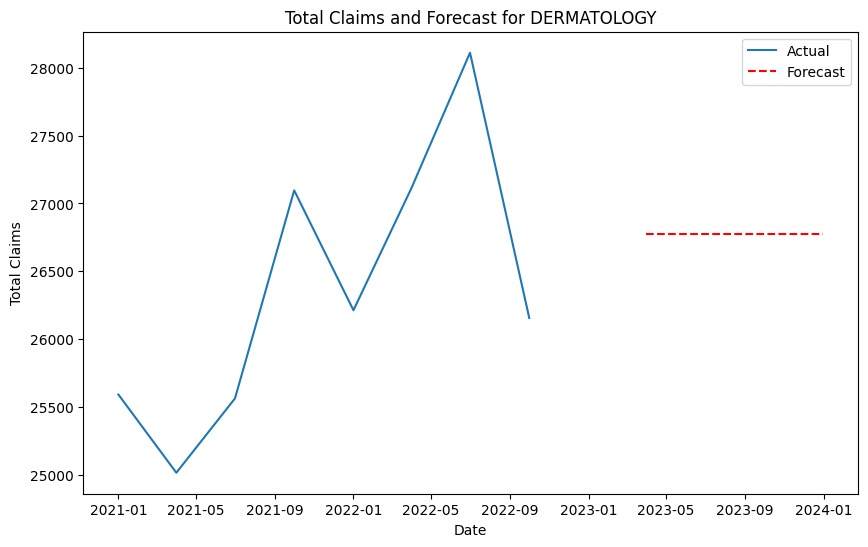

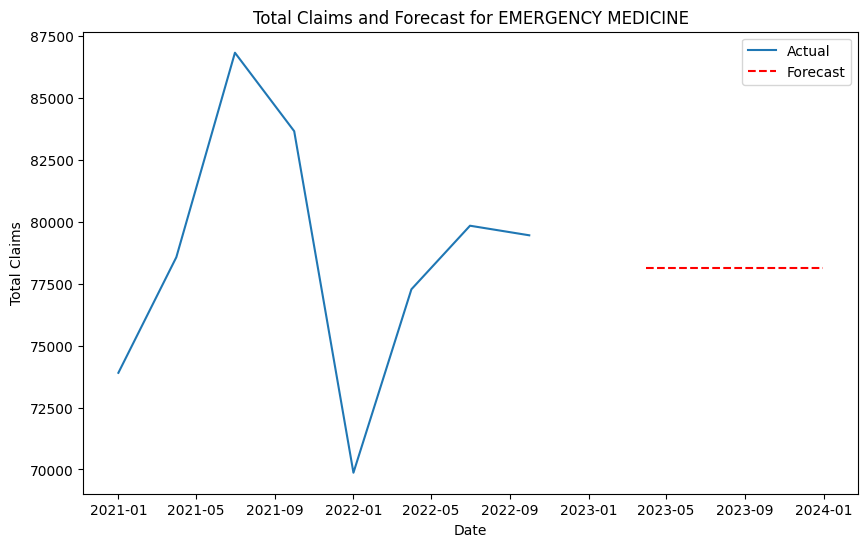

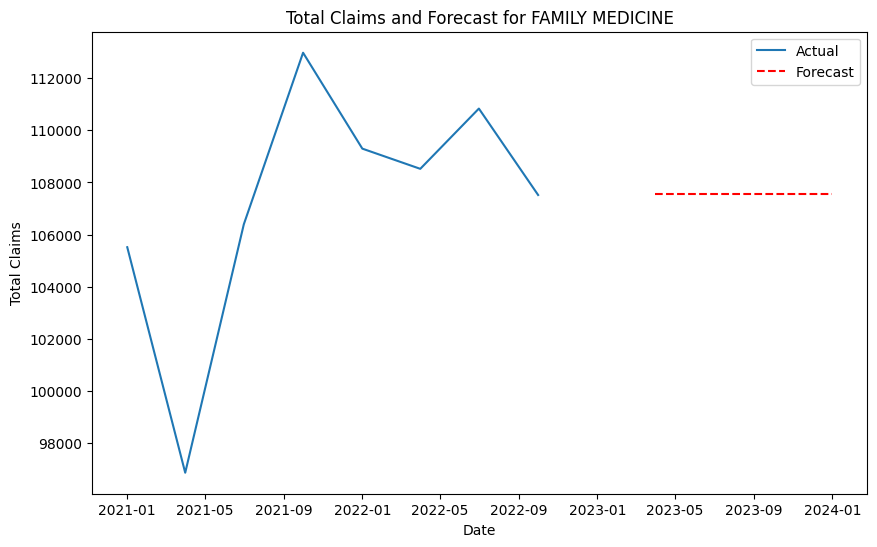

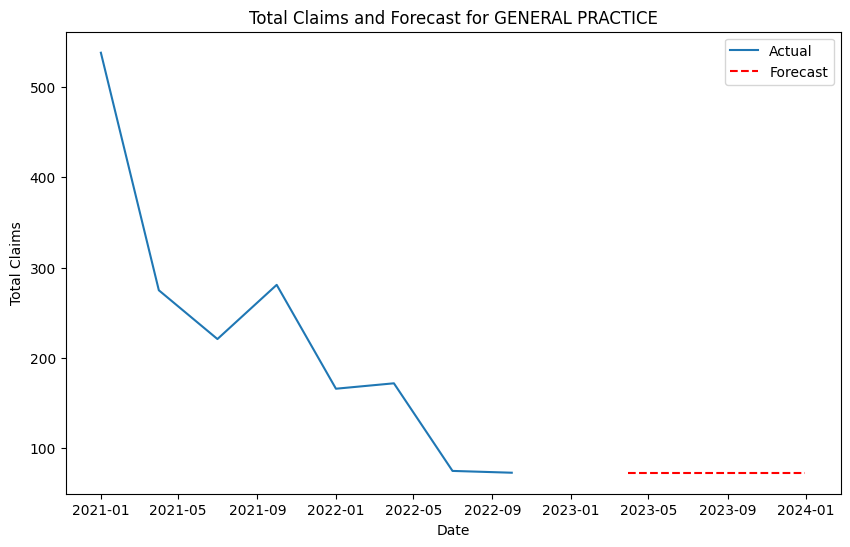

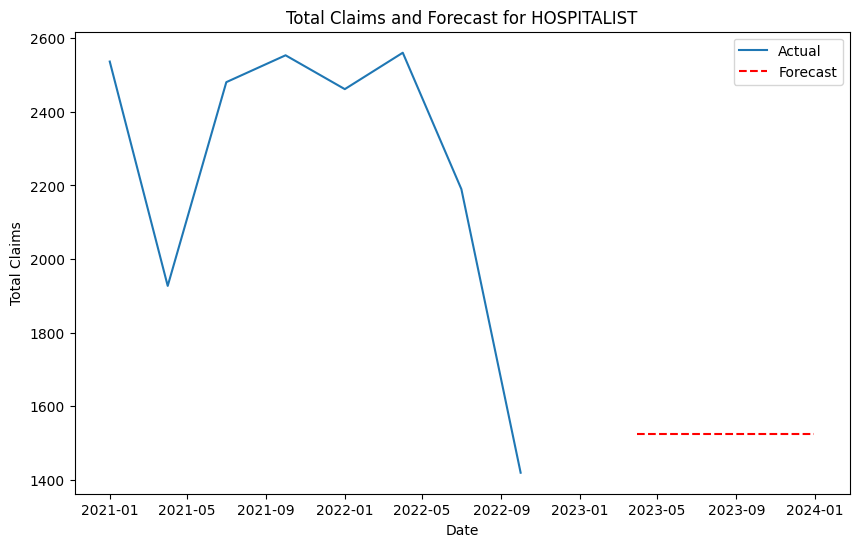

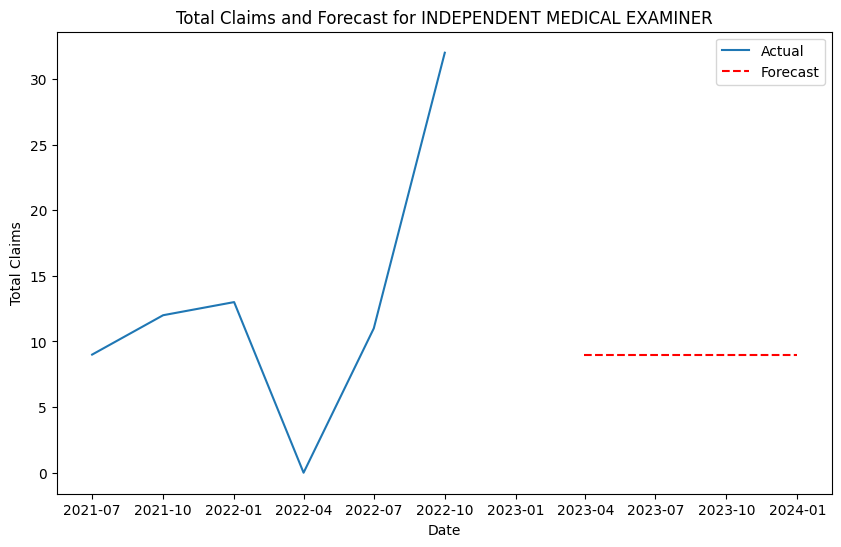

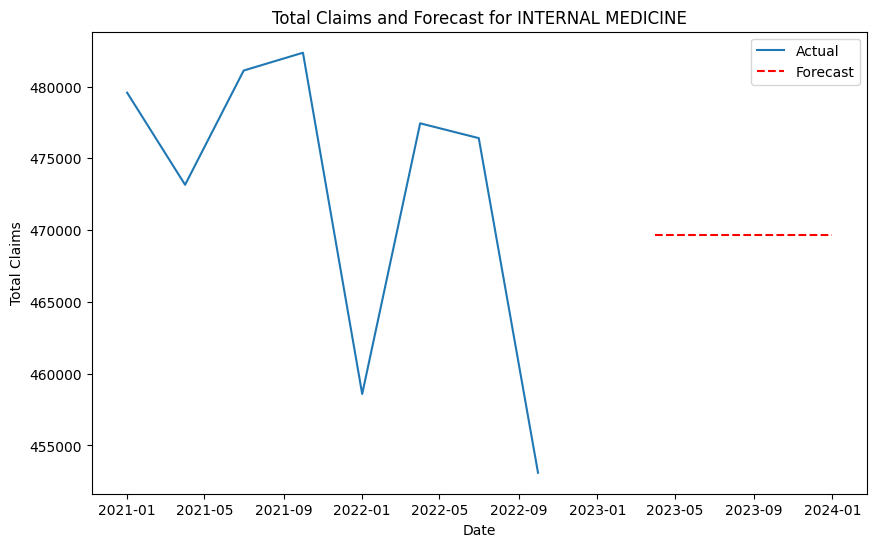

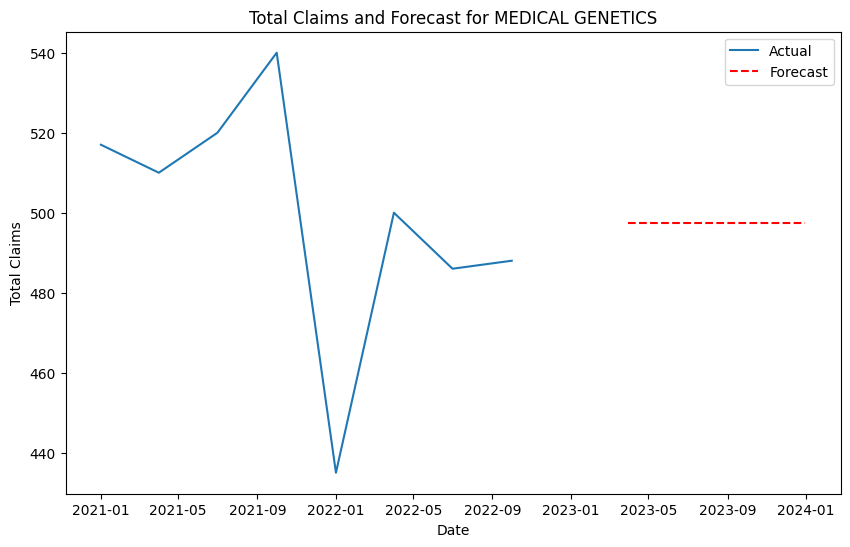

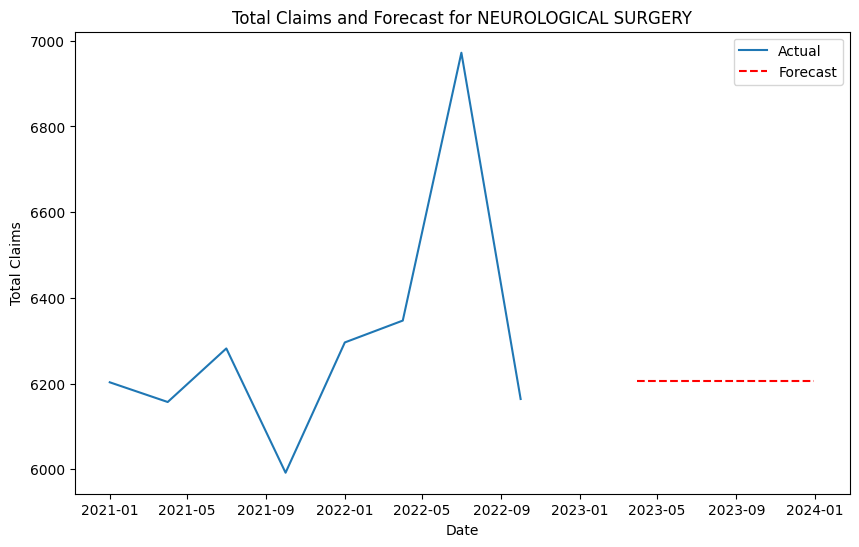

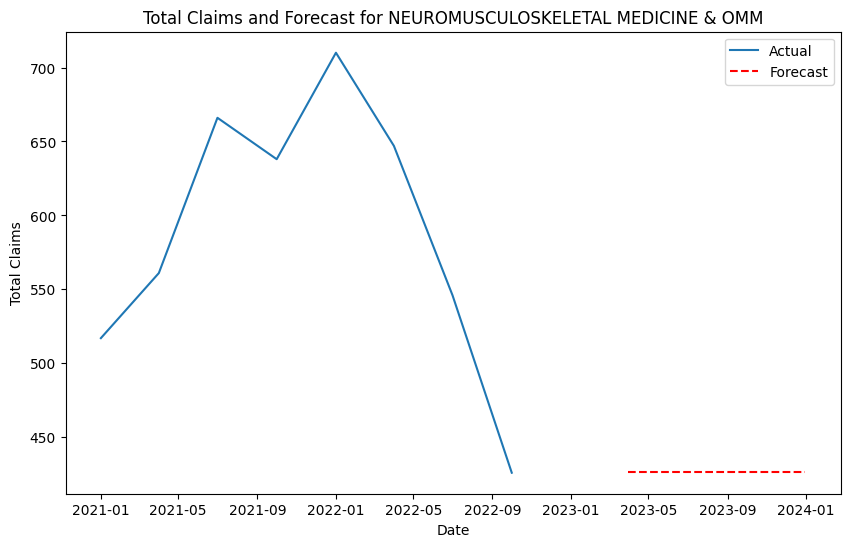

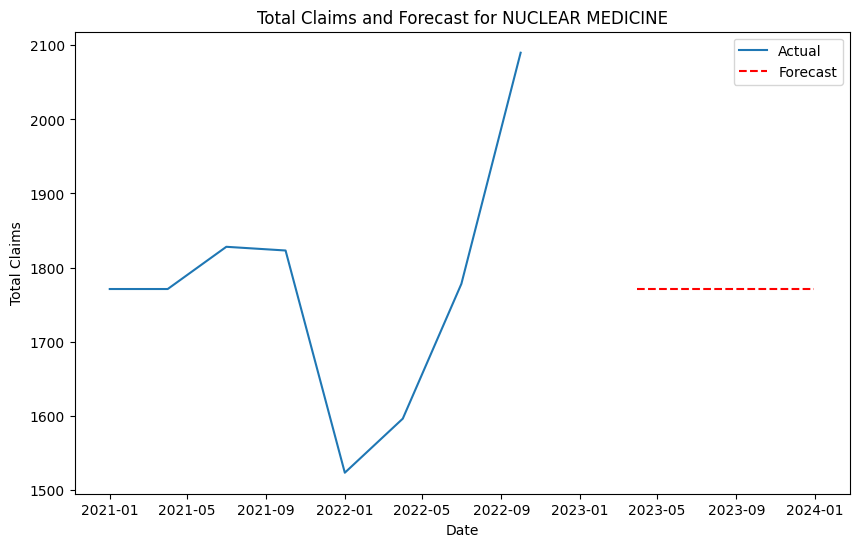

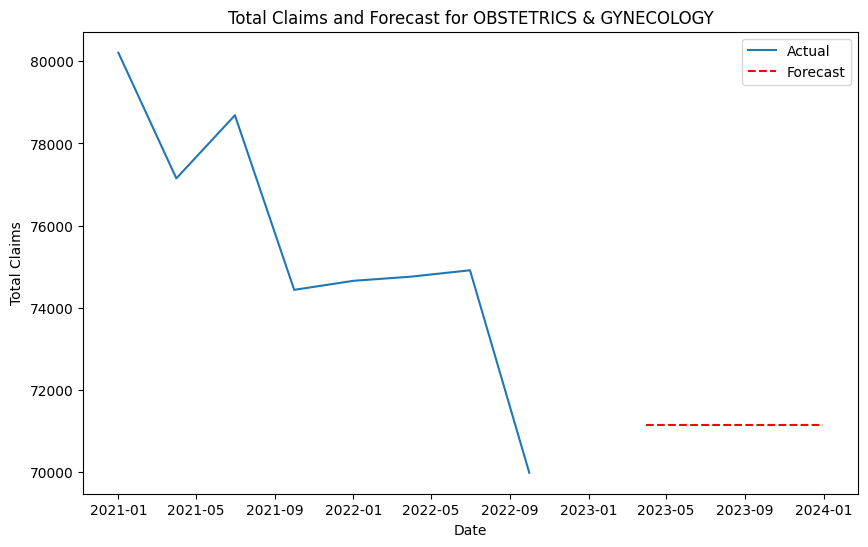

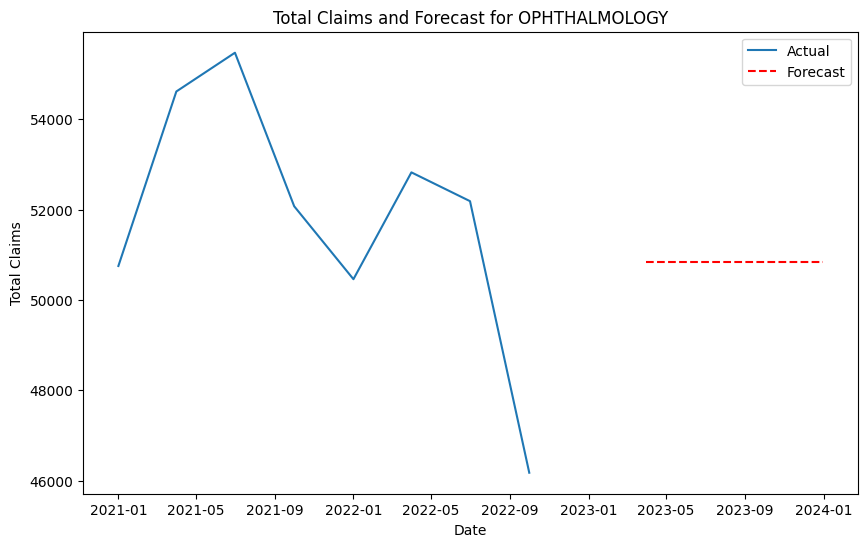

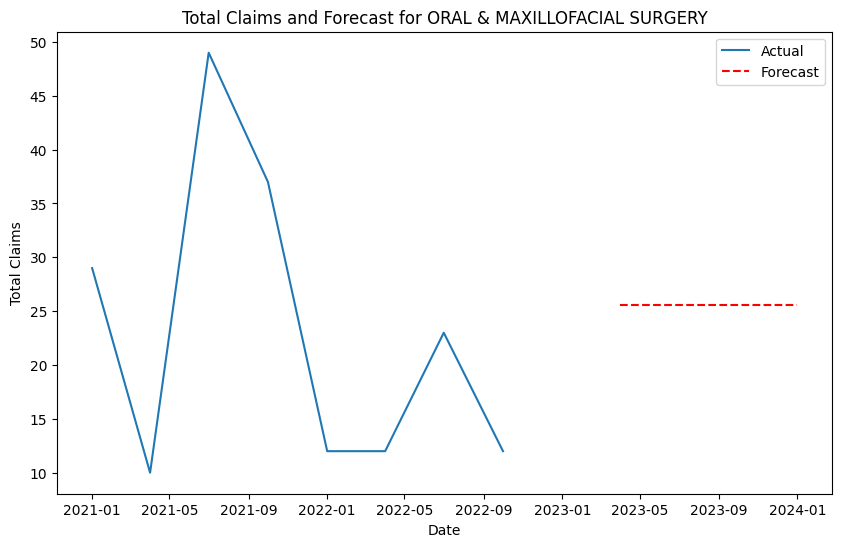

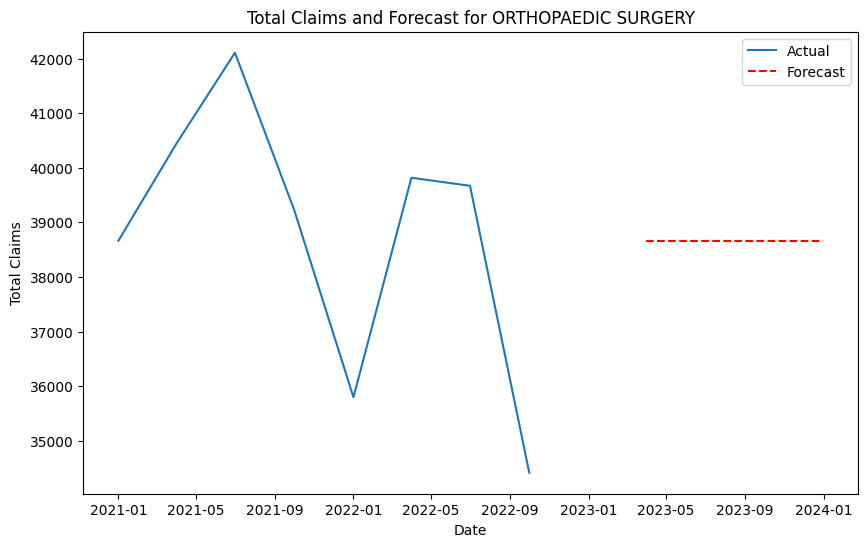

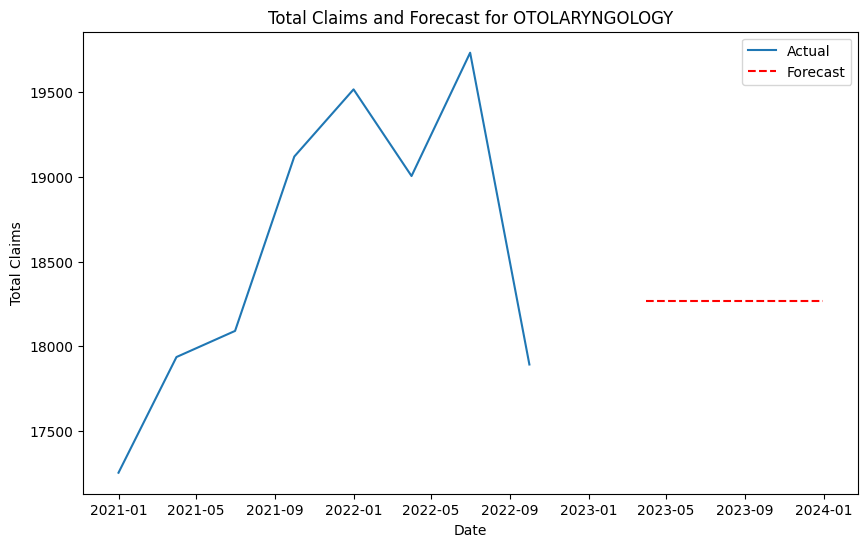

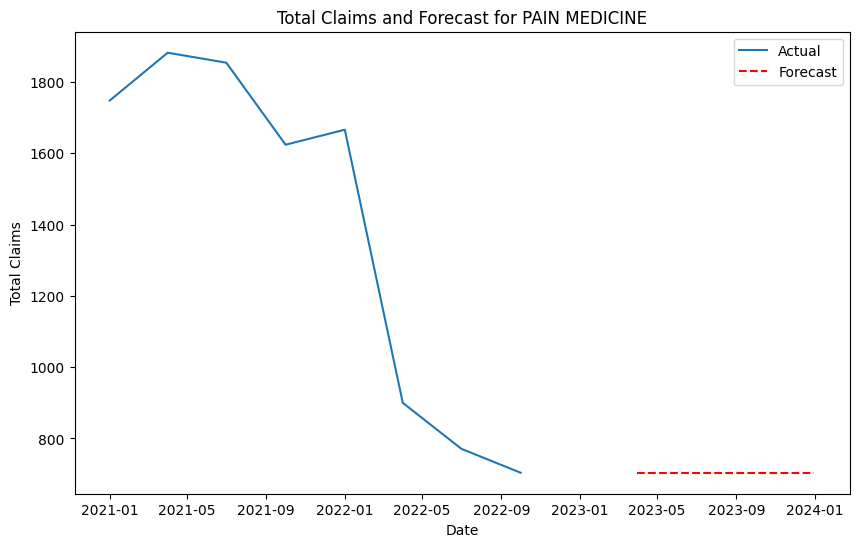

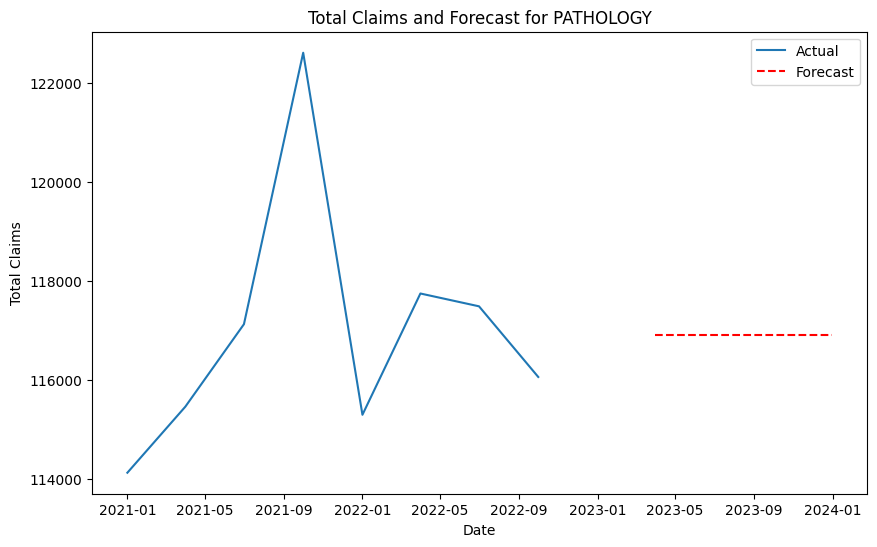

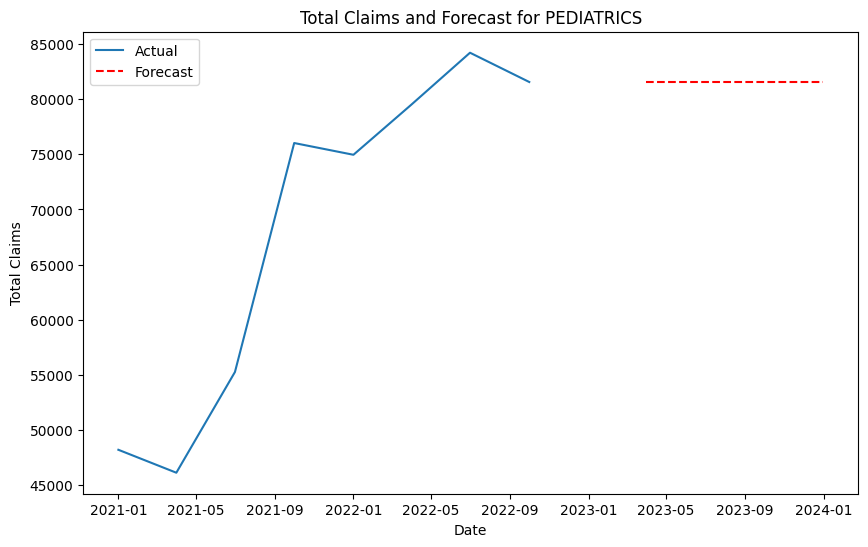

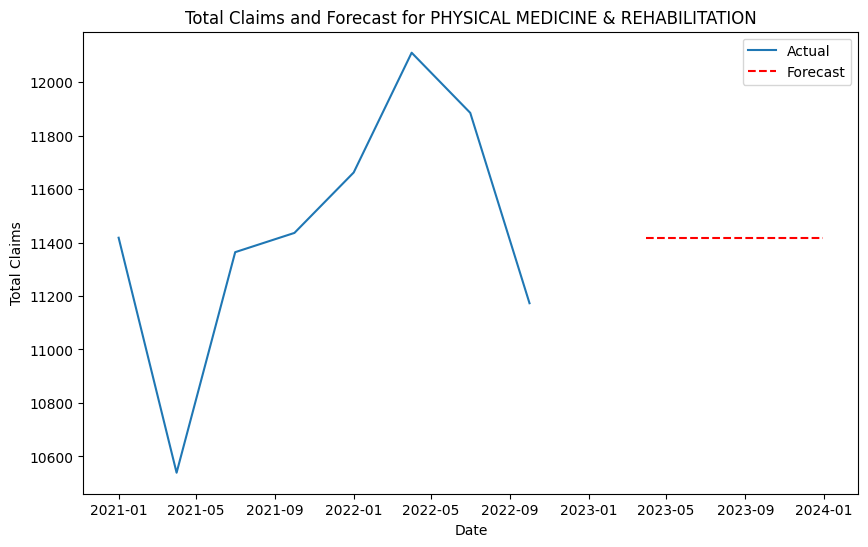

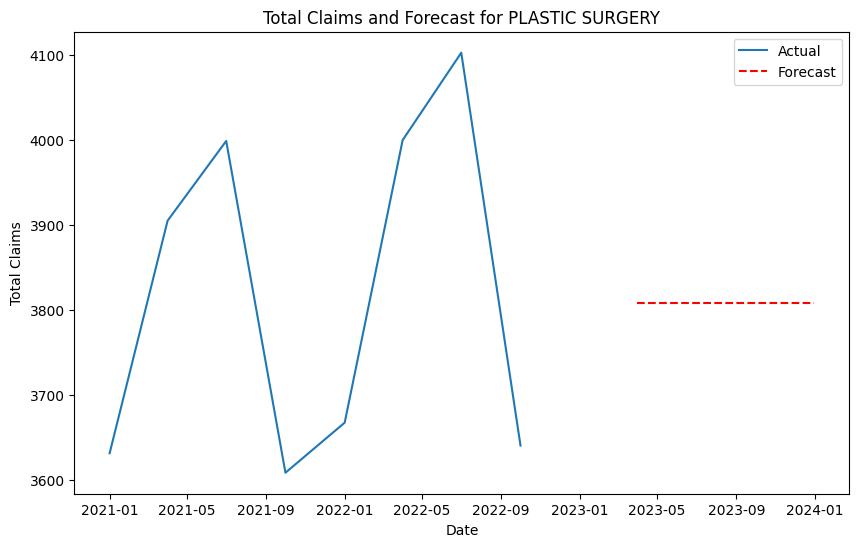

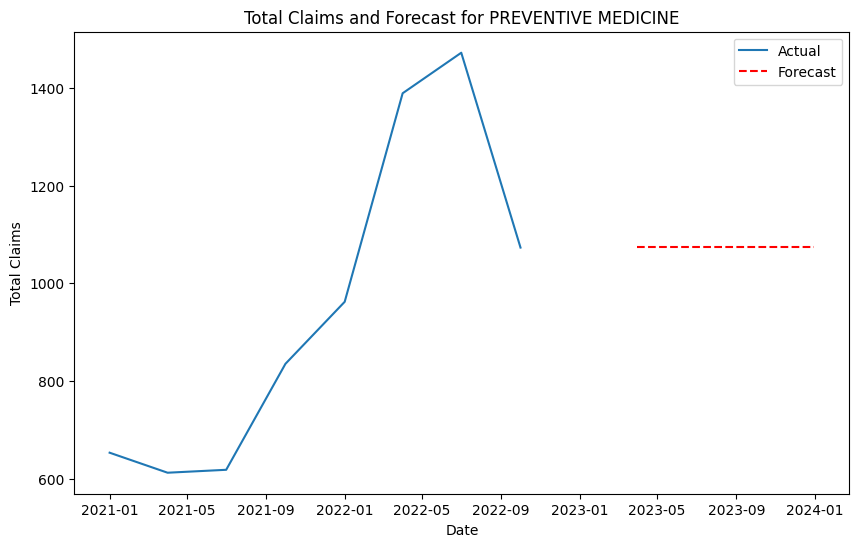

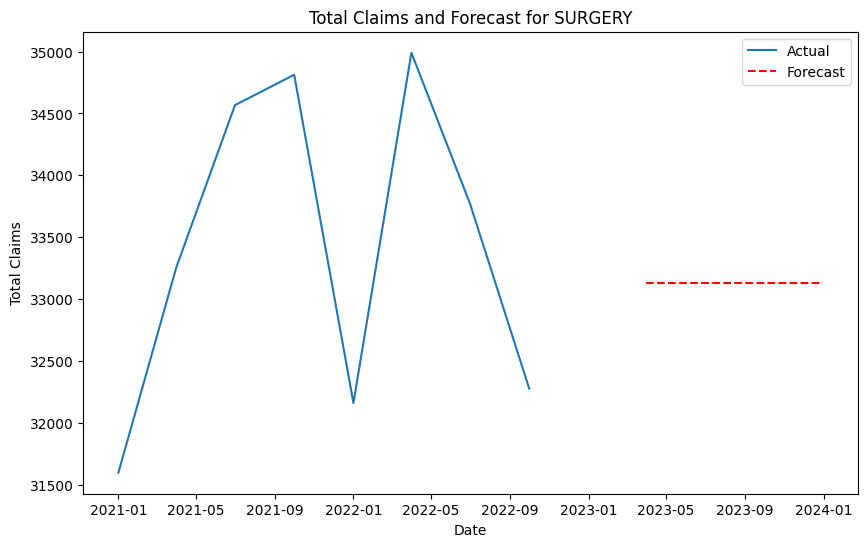

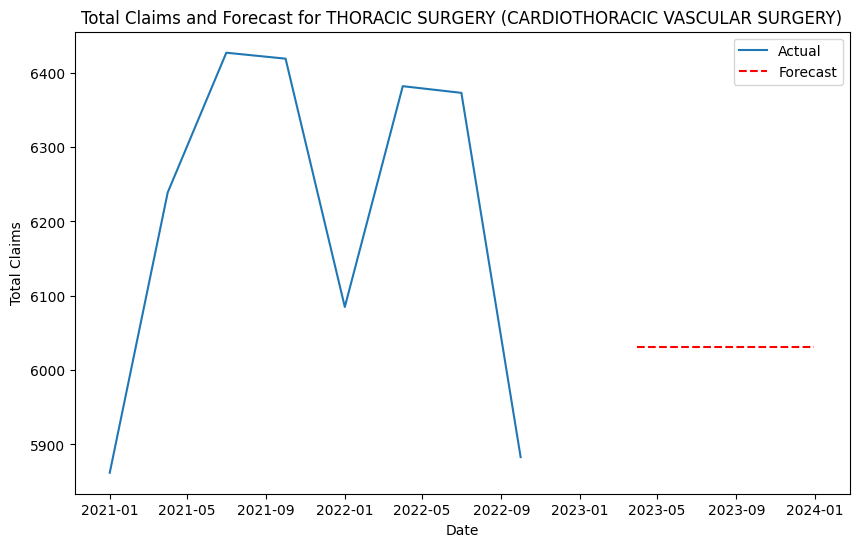

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Aggregate data by specialty, year, and quarter
agg_df = joined_df.groupby(['specialty', 'year', 'quarter']).agg({'total_claims': 'sum'}).reset_index()

# Convert year and quarter to a single datetime column
agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))

# Simple Exponential Smoothing Forecast
forecasts = {}

for specialty in agg_df['specialty'].unique():
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    ts_data = specialty_df.set_index('date')['total_claims']

    # Fit the SES model
    model = SimpleExpSmoothing(ts_data)
    results = model.fit()

    # Forecast for future periods (e.g., 4 quarters ahead)
    forecast = results.forecast(steps=4)
    forecasts[specialty] = forecast

# Display the forecasts
for specialty, forecast in forecasts.items():
    print(f"Forecast for {specialty} in 2023: {forecast.values}")

# Optional: Plot the results
for specialty in forecasts:
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    plt.figure(figsize=(10, 6))
    plt.plot(specialty_df['date'], specialty_df['total_claims'], label='Actual')
    future_dates = pd.date_range(start=specialty_df['date'].iloc[-1], periods=5, freq='Q')[1:]
    plt.plot(future_dates, forecasts[specialty], label='Forecast', color='red', linestyle='--')
    plt.title(f'Total Claims and Forecast for {specialty}')
    plt.xlabel('Date')
    plt.ylabel('Total Claims')
    plt.legend()
    plt.show()


/var/folders/nv/yklnrk8j1x12vh39751vkm6w0000gn/T/ipykernel_9008/1416517116.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/statsmodel

Forecast for ALLERGY & IMMUNOLOGY in 2023: [5664.99999061 5383.99998106 5102.99997151 4821.99996196]
Forecast for ANESTHESIOLOGY in 2023: [38944.72999837 39332.84175949 39720.95352061 40109.06528173]
Forecast for COLON & RECTAL SURGERY in 2023: [5757.06882239 5735.06897519 5713.06912799 5691.06928079]
Forecast for DERMATOLOGY in 2023: [27429.17899521 27658.93212988 27888.68526456 28118.43839923]
Forecast for EMERGENCY MEDICINE in 2023: [80488.75955725 81515.43748247 82542.11540769 83568.79333291]
Forecast for FAMILY MEDICINE in 2023: [107902.70284663 107392.44244874 106882.18205084 106371.92165295]
Forecast for GENERAL PRACTICE in 2023: [ -16.85707969  -70.63087274 -124.40466579 -178.17845884]
Forecast for HOSPITALIST in 2023: [1934.21023296 1861.20308062 1788.19592827 1715.18877593]
Forecast for INDEPENDENT MEDICAL EXAMINER in 2023: [22.73333411 25.56190588 28.39047766 31.21904944]
Forecast for INTERNAL MEDICINE in 2023: [462162.2742422  459370.41862527 456578.56300835 453786.70739142

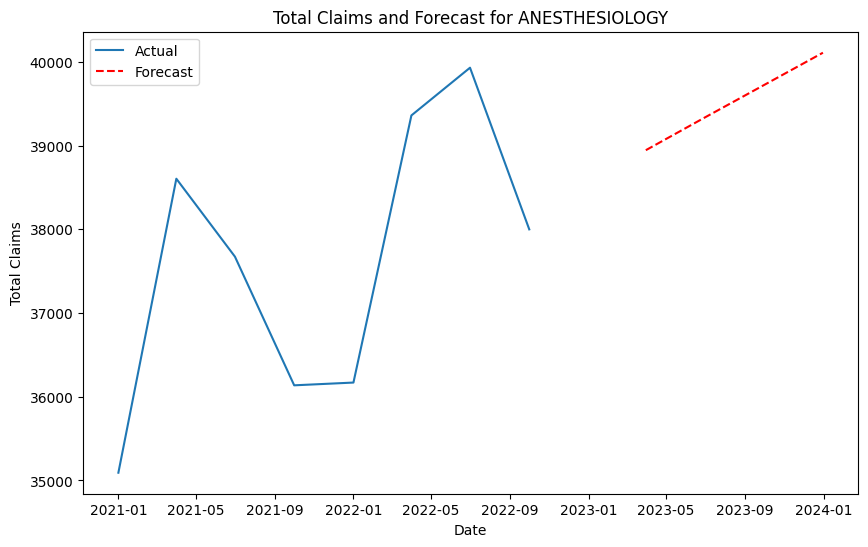

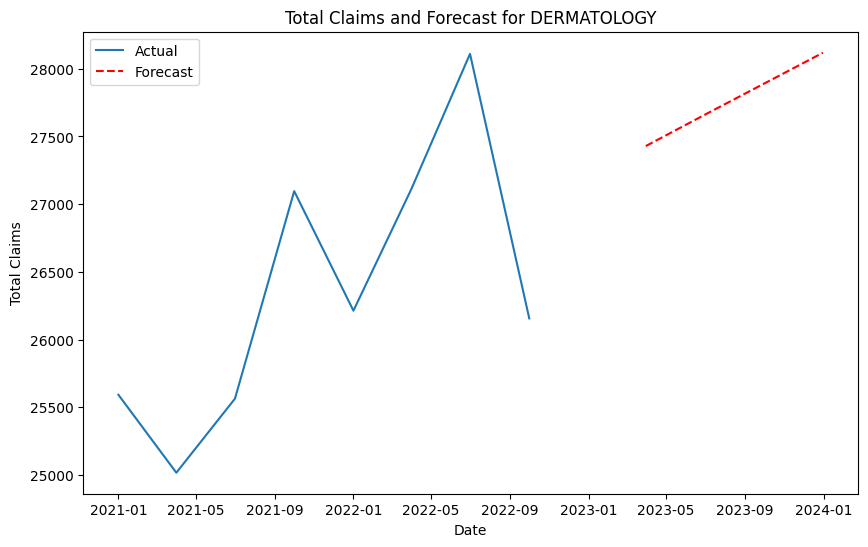

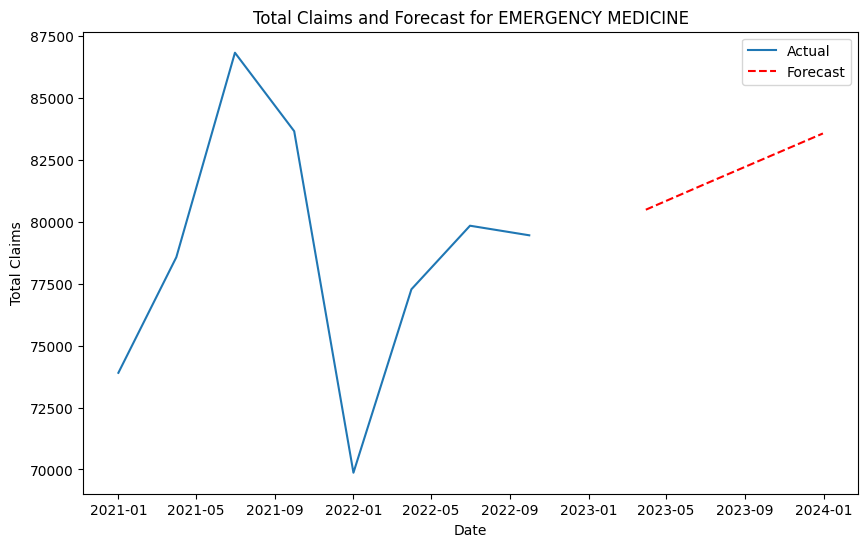

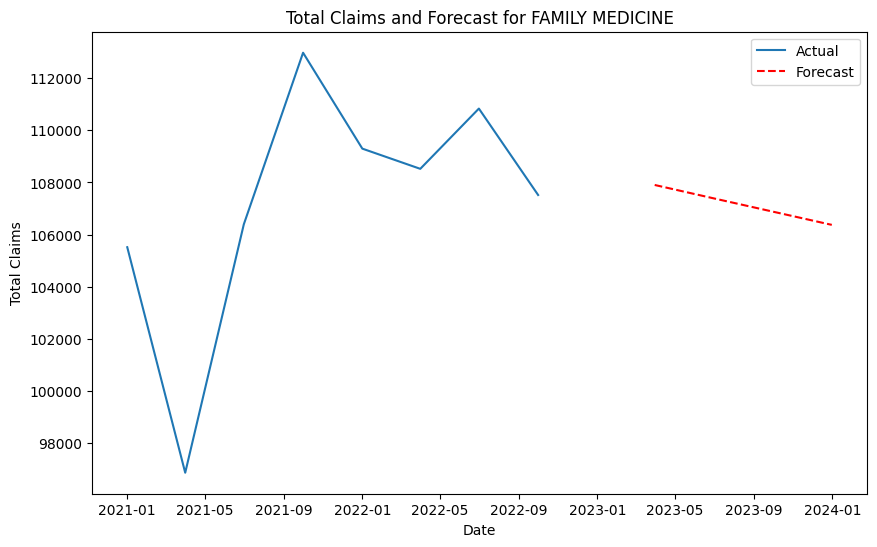

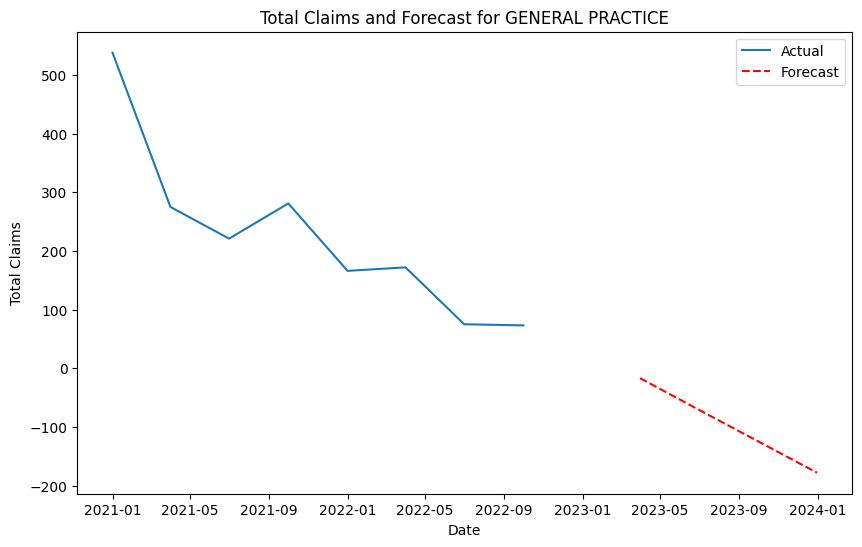

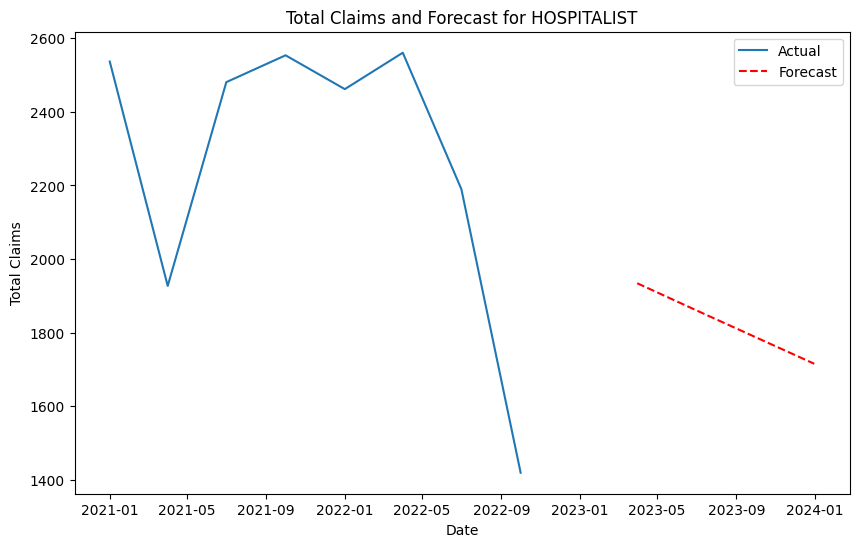

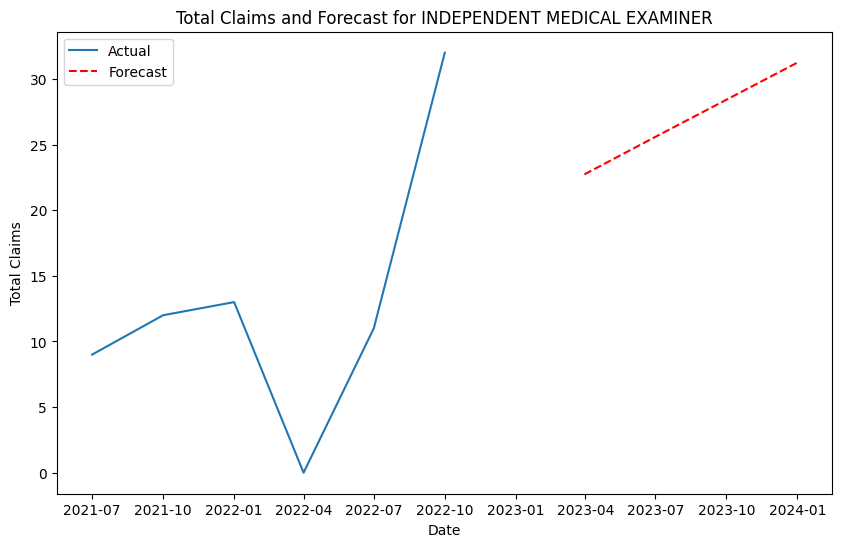

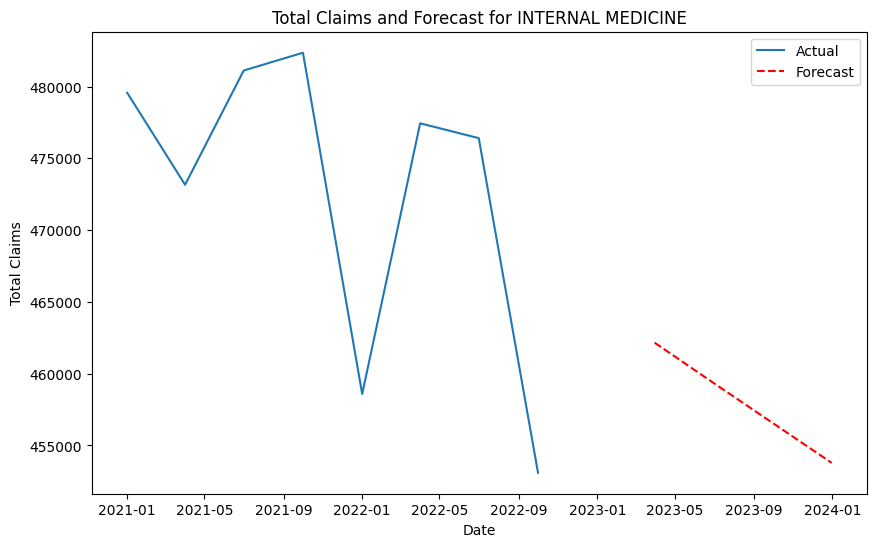

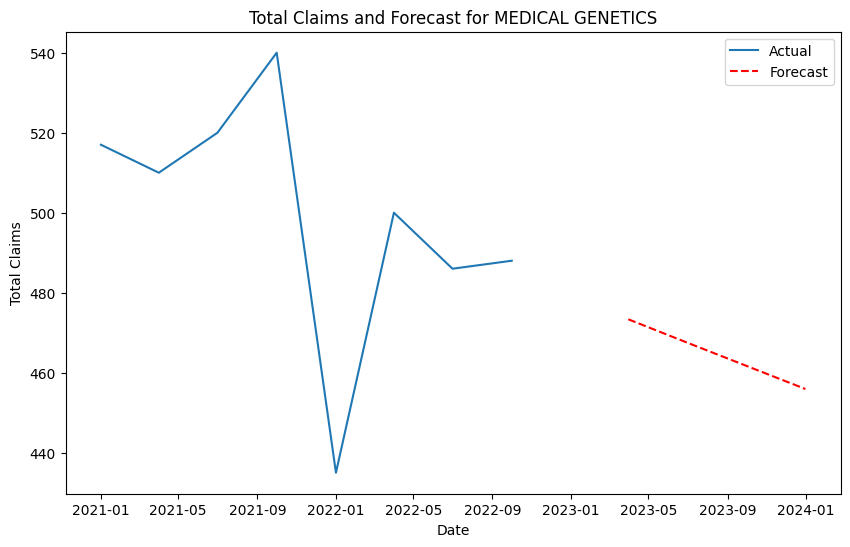

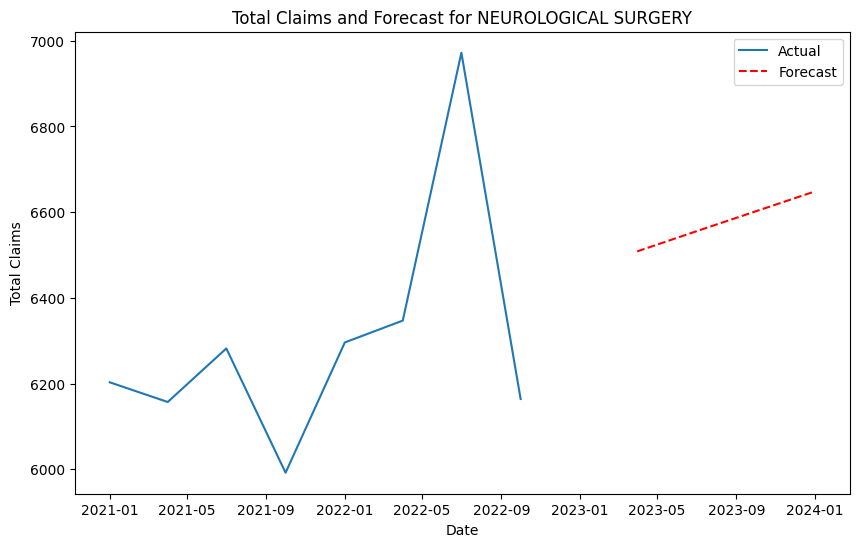

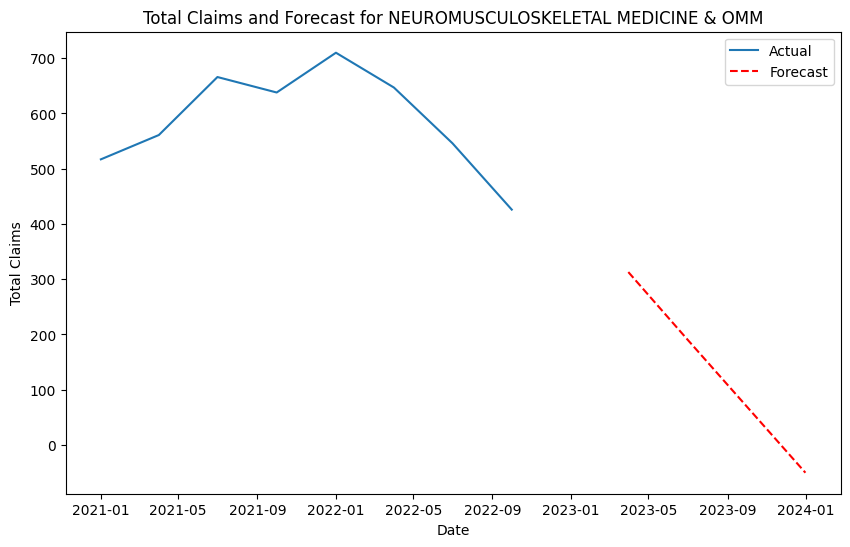

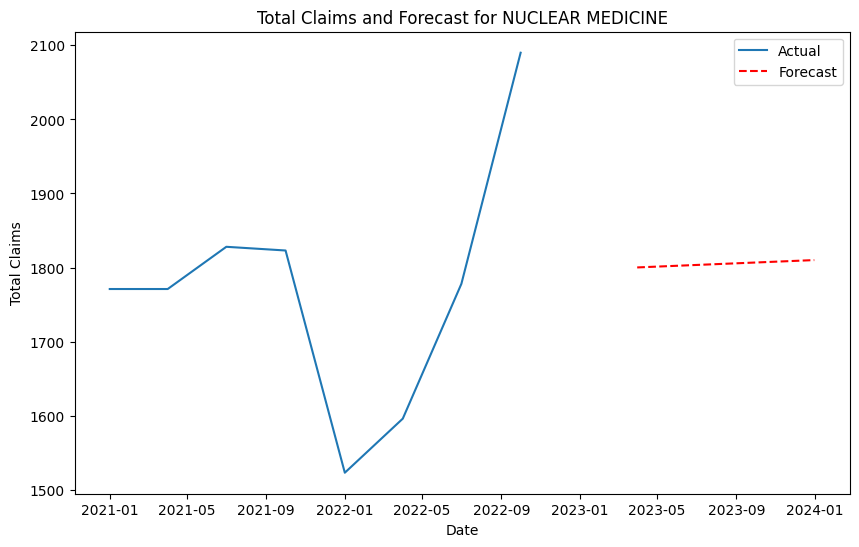

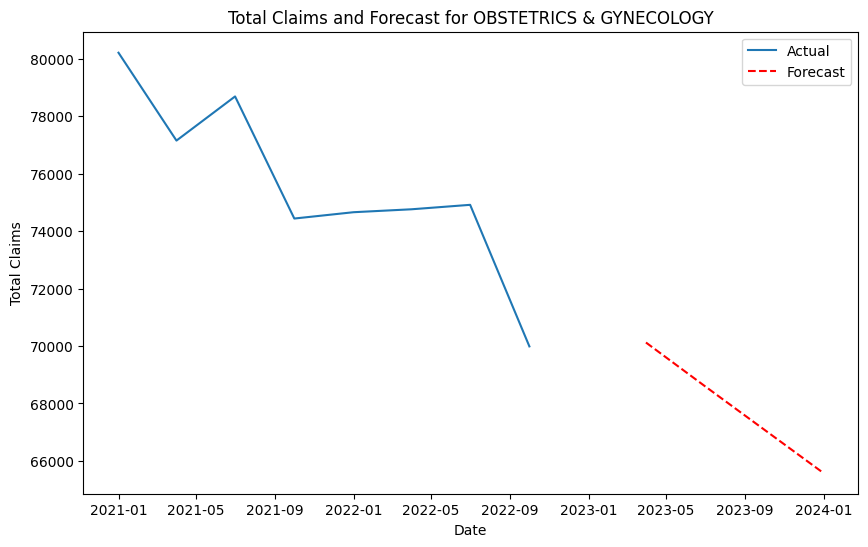

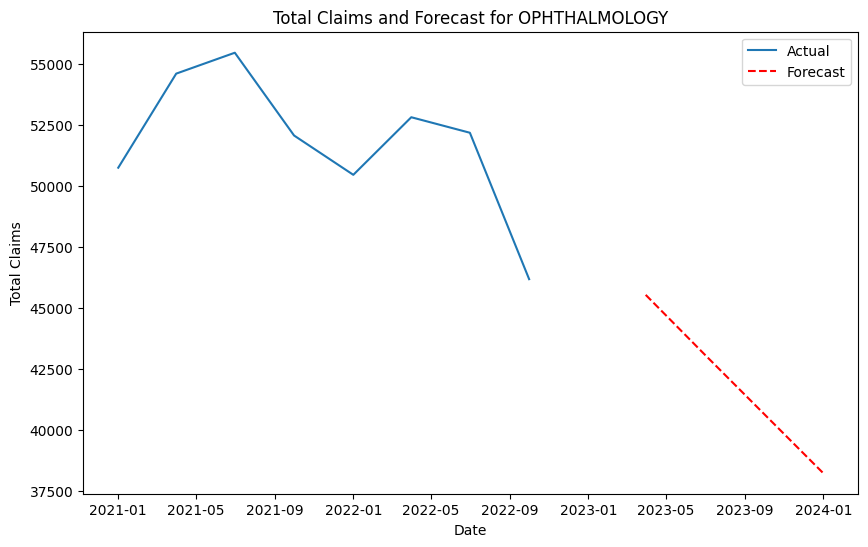

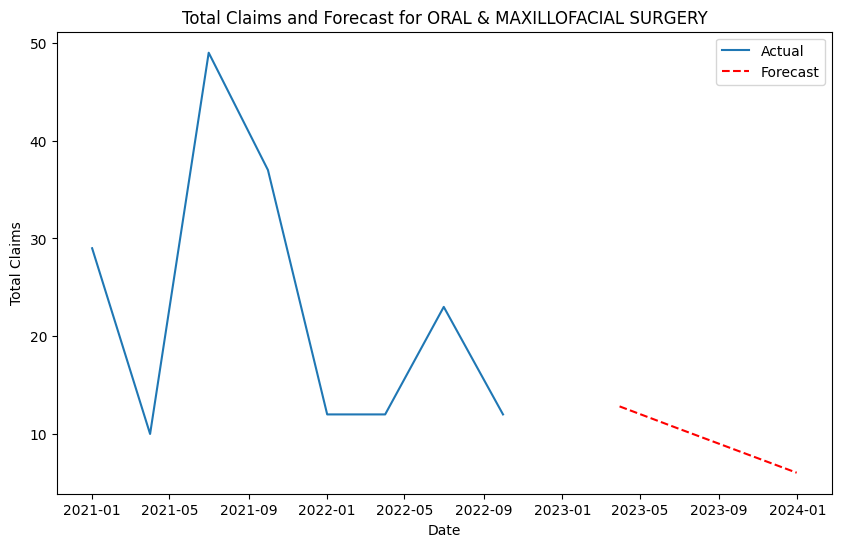

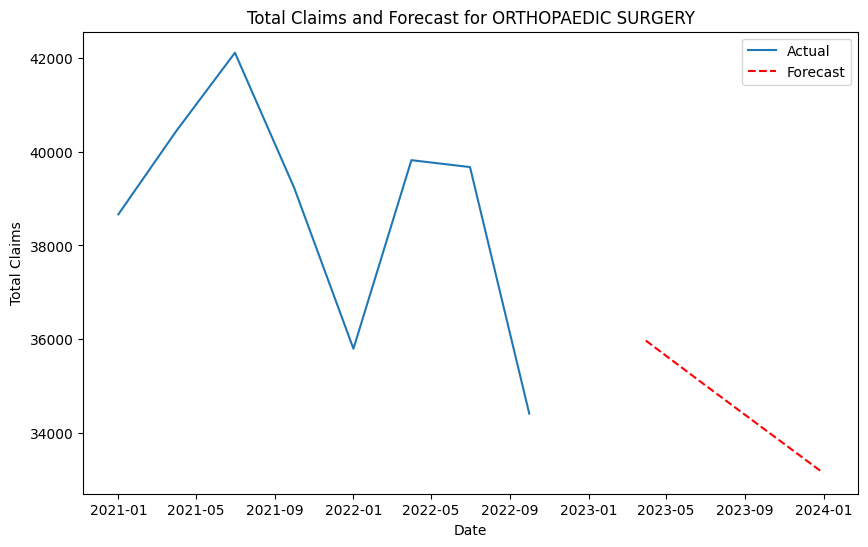

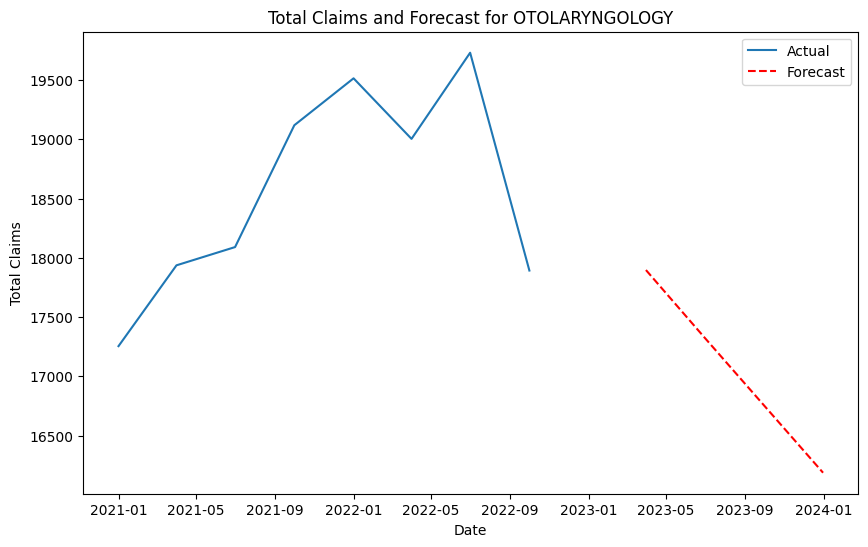

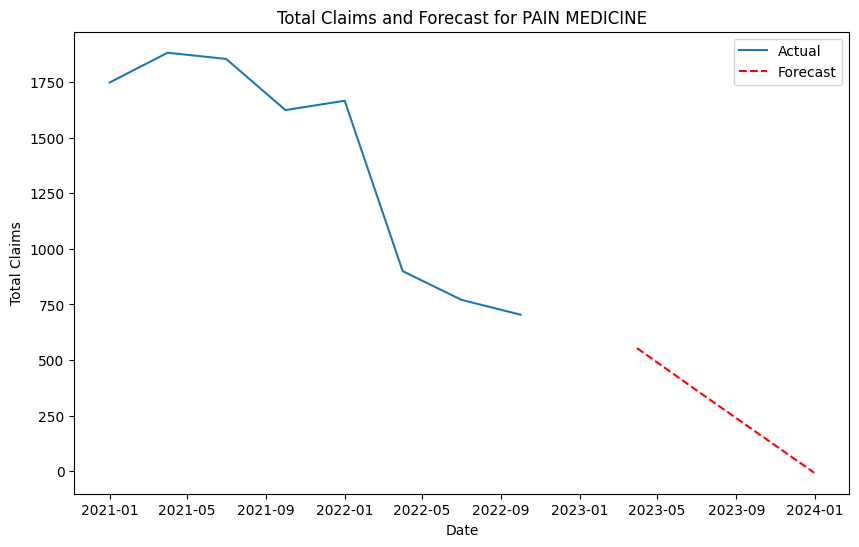

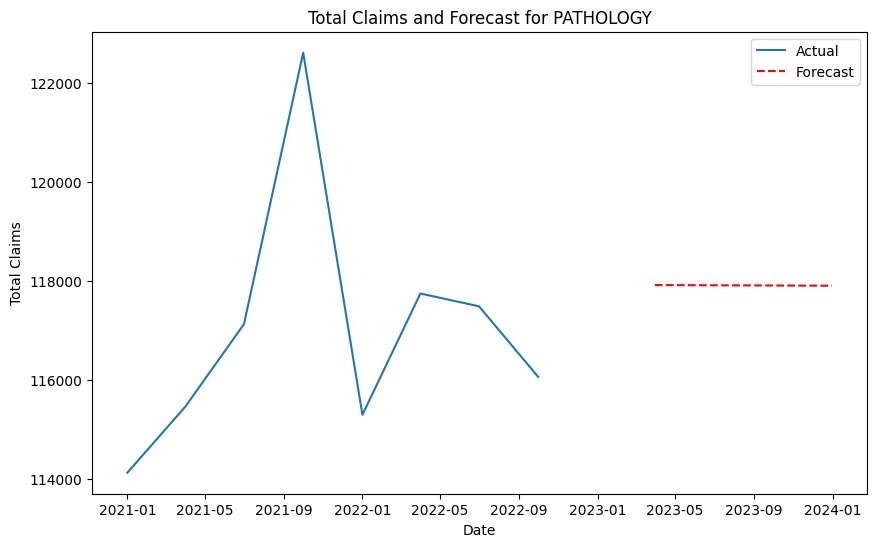

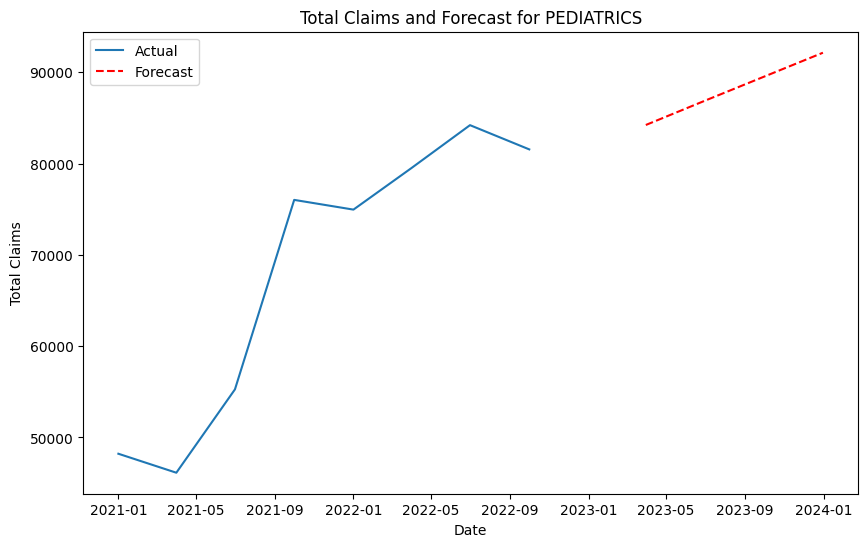

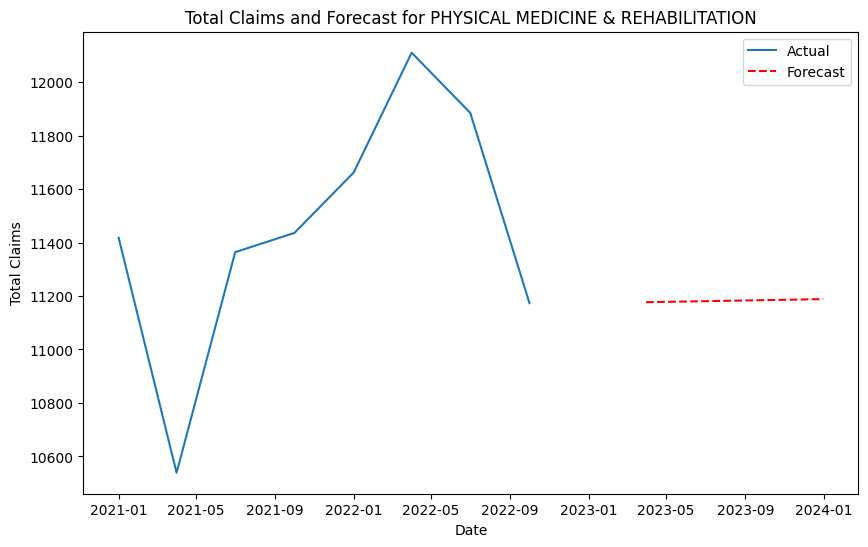

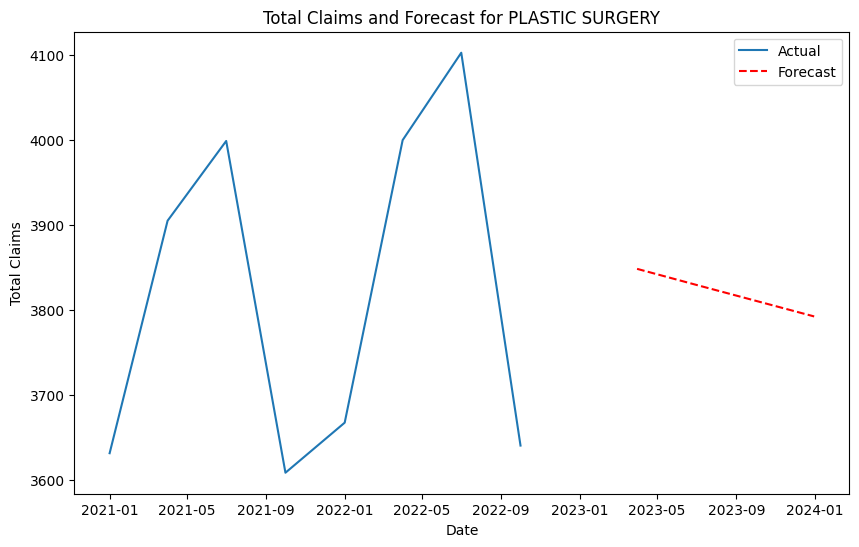

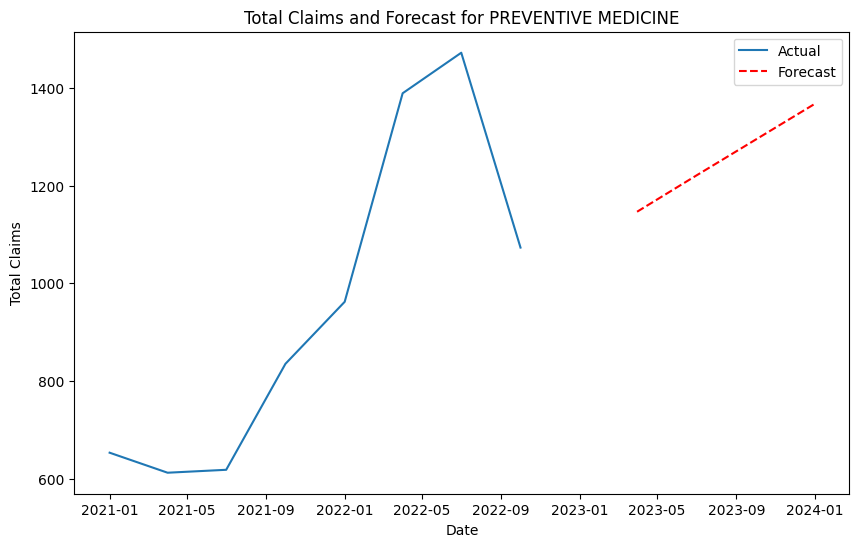

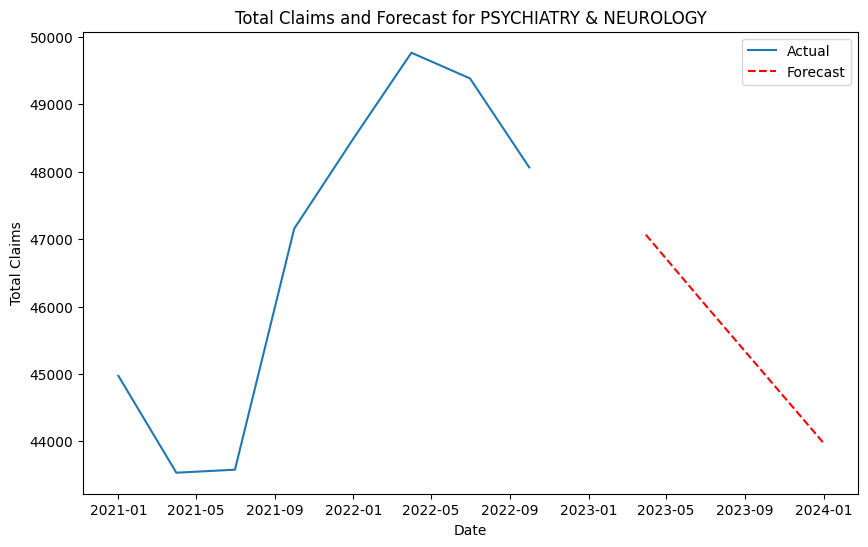

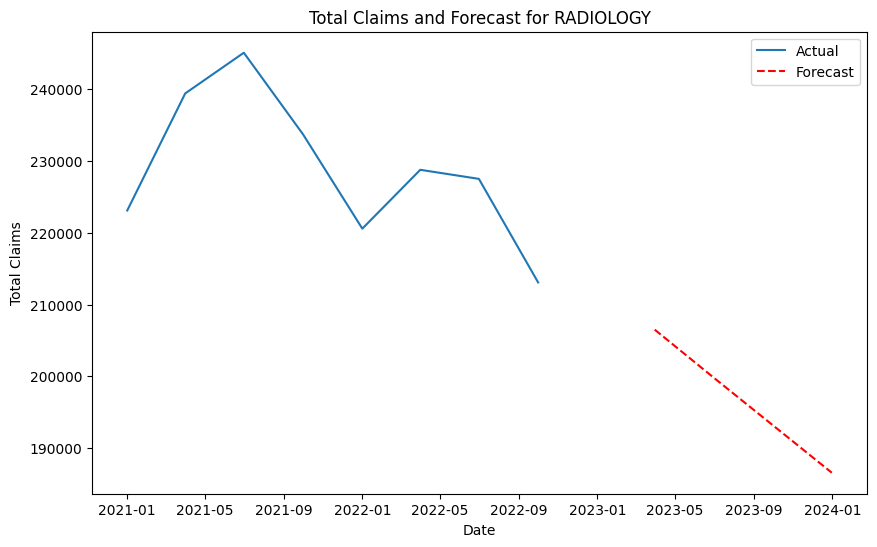

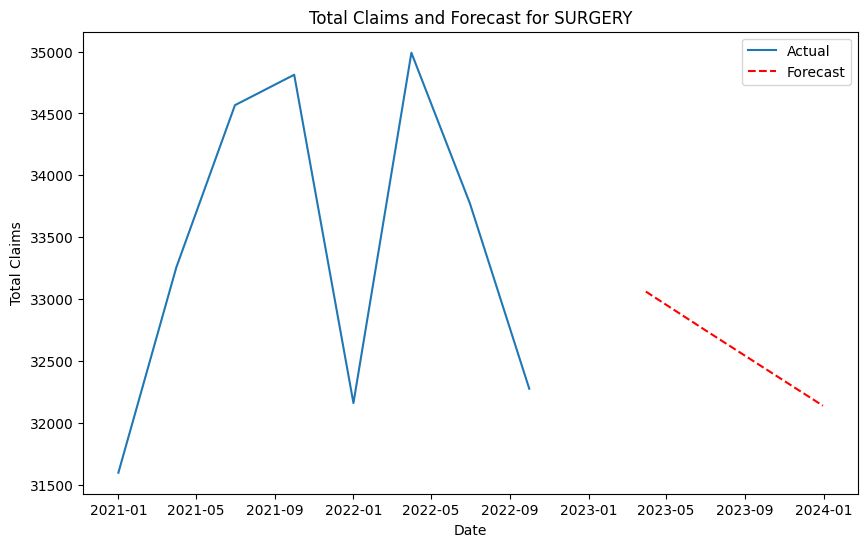

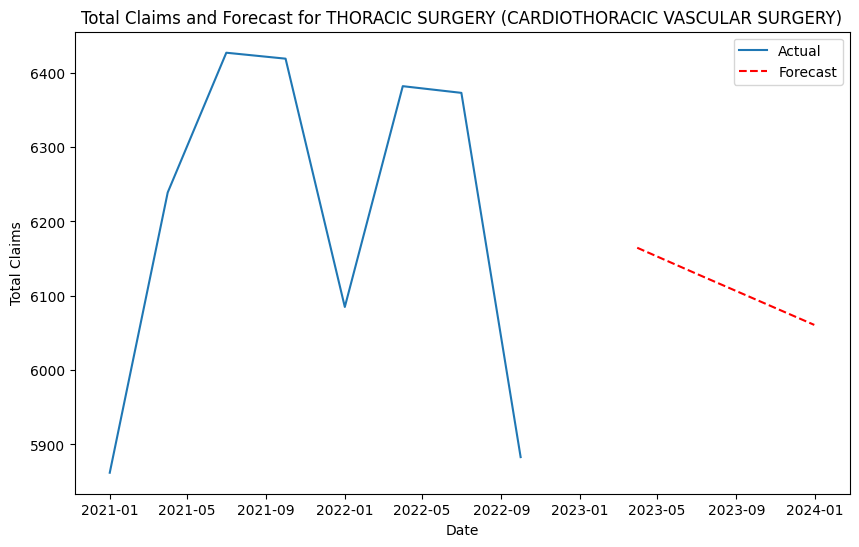

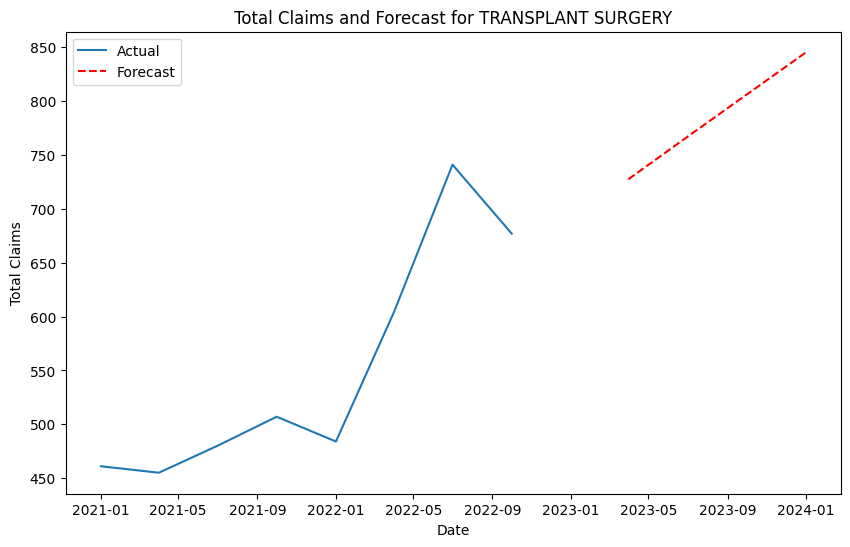

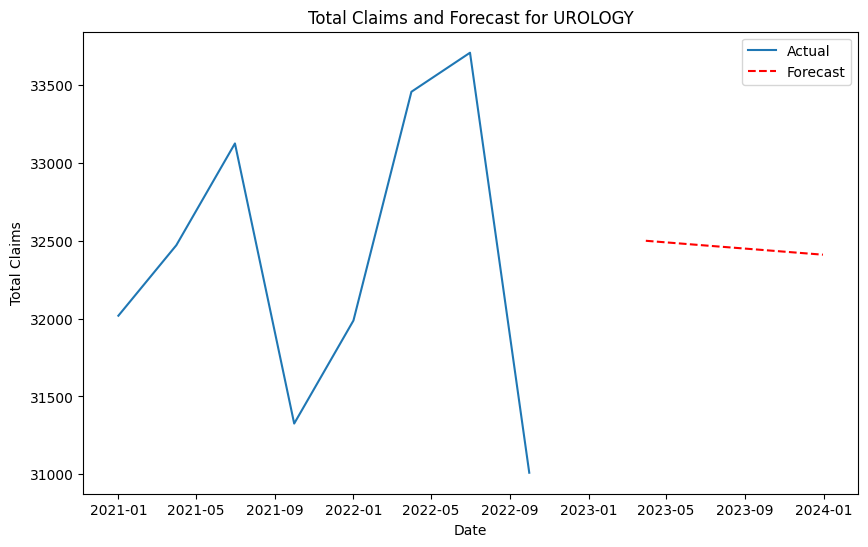

In [12]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Aggregate data by specialty, year, and quarter
agg_df = joined_df.groupby(['specialty', 'year', 'quarter']).agg({'total_claims': 'sum'}).reset_index()

# Convert year and quarter to a single datetime column
agg_df['date'] = pd.to_datetime(agg_df['year'].astype(str) + 'Q' + agg_df['quarter'].astype(str))

# Holt's Linear Trend Forecast
forecasts = {}

for specialty in agg_df['specialty'].unique():
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    ts_data = specialty_df.set_index('date')['total_claims']

    # Fit the Holt's Linear Trend model
    model = ExponentialSmoothing(ts_data, trend='add', seasonal=None, damped_trend=False)
    results = model.fit()

    # Forecast for future periods (e.g., 4 quarters ahead)
    forecast = results.forecast(steps=4)
    forecasts[specialty] = forecast

# Display the forecasts
for specialty, forecast in forecasts.items():
    print(f"Forecast for {specialty} in 2023: {forecast.values}")

# Plot
for specialty in forecasts:
    specialty_df = agg_df[agg_df['specialty'] == specialty]
    plt.figure(figsize=(10, 6))
    plt.plot(specialty_df['date'], specialty_df['total_claims'], label='Actual')
    future_dates = pd.date_range(start=specialty_df['date'].iloc[-1], periods=5, freq='Q')[1:]
    plt.plot(future_dates, forecasts[specialty], label='Forecast', color='red', linestyle='--')
    plt.title(f'Total Claims and Forecast for {specialty}')
    plt.xlabel('Date')
    plt.ylabel('Total Claims')
    plt.legend()
    plt.show()
